<h1><p><center style="background: linear-gradient(to right,black,white);color: transparent;font-family: Gabriola;color: white;font-size: 210%;text-align: left;border-radius: 80px 70px">Predicting Creditworthiness
</center></p></h
>

<img src="https://img.freepik.com/premium-photo/two-credit-cards-black-gold-color-hand-black-background_335640-3580.jpg" width="1200" height="1200">

# 1. Business Problem
Predicting creditworthiness using machine learning significantly shortens the credit evaluation process compared to traditional manual evaluations. 
It also allows banks to implement tailored credit card lending rules for each category, ensuring that creditworthy individuals receive appropriate terms while managing risk for those deemed not creditworthy.

The **objective** of this project is to identify and recommend the most effective machine learning algorithm for predicting an individual’s creditworthiness based on attributes such as Income, Age, Education, Gender, Student status, Marital status, Ethnicity and Credit Card Balance(Spending) with the bank’s past decisions regarding Credit Limit, Rating, and number of Cards held for each credit card applicant.

**Data source:** : https://www.kaggle.com/datasets/rassiem/credit-data

# 2. Data Import

## Loading the required libraries

In [1]:
# Importing all required libraries
!pip install ipywidgets --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import randint
import seaborn as sns

# Use the dark background style
plt.style.use('dark_background')

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

## Importing the data

In [2]:
data = pd.read_csv("Credit_Data.csv")
display(data)

ID   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0      1   14.891   3606     283      2   34         11    Male      No   
1      2  106.025   6645     483      3   82         15  Female     Yes   
2      3  104.593   7075     514      4   71         11    Male      No   
3      4  148.924   9504     681      3   36         11  Female      No   
4      5   55.882   4897     357      2   68         16    Male      No   
..   ...      ...    ...     ...    ...  ...        ...     ...     ...   
395  396   12.096   4100     307      3   32         13    Male      No   
396  397   13.364   3838     296      5   65         17    Male      No   
397  398   57.872   4171     321      5   67         12  Female      No   
398  399   37.728   2525     192      1   44         13    Male      No   
399  400   18.701   5524     415      5   64          7  Female      No   

    Married         Ethnicity  Balance  
0       Yes         Caucasian      333  
1       Yes             Asian      903  
2        No             Asian      580  
3        No             Asian      964  
4       Yes         Caucasian      331  
..      ...               ...      ...  
395     Yes         Caucasian      560  
396      No  African American      480  
397     Yes         Caucasian      138  
398     Yes         Caucasian        0  
399      No             Asian      966  

[400 rows x 12 columns]

## Adding more data

Increasing the training dataset size to give the model more examples to learn from.

In [3]:
# Filter rows where column_name is 1
rows_to_duplicate = data

# Repeat the rows to duplicate n times
n = 3  # Number of times you want to duplicate the rows
duplicated_rows = pd.concat([rows_to_duplicate] * n, ignore_index=True)

# Combine the original DataFrame with the duplicated rows
data = pd.concat([data, duplicated_rows], ignore_index=True)
display(data)

ID   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0       1   14.891   3606     283      2   34         11    Male      No   
1       2  106.025   6645     483      3   82         15  Female     Yes   
2       3  104.593   7075     514      4   71         11    Male      No   
3       4  148.924   9504     681      3   36         11  Female      No   
4       5   55.882   4897     357      2   68         16    Male      No   
...   ...      ...    ...     ...    ...  ...        ...     ...     ...   
1595  396   12.096   4100     307      3   32         13    Male      No   
1596  397   13.364   3838     296      5   65         17    Male      No   
1597  398   57.872   4171     321      5   67         12  Female      No   
1598  399   37.728   2525     192      1   44         13    Male      No   
1599  400   18.701   5524     415      5   64          7  Female      No   

     Married         Ethnicity  Balance  
0        Yes         Caucasian      333  
1        Yes             Asian      903  
2         No             Asian      580  
3         No             Asian      964  
4        Yes         Caucasian      331  
...      ...               ...      ...  
1595     Yes         Caucasian      560  
1596      No  African American      480  
1597     Yes         Caucasian      138  
1598     Yes         Caucasian        0  
1599      No             Asian      966  

[1600 rows x 12 columns]

# 3. Data Understanding

## Basic exploration

In [4]:
print("Dimension of the data :", data.shape)

Dimension of the data : (1600, 12)


In [5]:
print("Structure of the data :")
print()
data.info()

Structure of the data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1600 non-null   int64  
 1   Income     1600 non-null   float64
 2   Limit      1600 non-null   int64  
 3   Rating     1600 non-null   int64  
 4   Cards      1600 non-null   int64  
 5   Age        1600 non-null   int64  
 6   Education  1600 non-null   int64  
 7   Gender     1600 non-null   object 
 8   Student    1600 non-null   object 
 9   Married    1600 non-null   object 
 10  Ethnicity  1600 non-null   object 
 11  Balance    1600 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 150.1+ KB


In [6]:
print("Missing values in the entire dataframe :", data.isnull().sum().sum() )

Missing values in the entire dataframe : 0


In [7]:
# Summmary of Statistical Distribution

# Get basic descriptive statistics including all columns (both numeric and object)
desc_stats = data.describe(include='all')

# Calculate median only for numeric columns
median = data.select_dtypes(include=['number']).median()

# Calculate mode for all columns (mode can apply to both numeric and categorical columns)
mode = data.mode().iloc[0]

# Convert median and mode into DataFrames so they can be concatenated
median_df = pd.DataFrame(median).transpose()  # Convert median to DataFrame and transpose for appending
mode_df = pd.DataFrame(mode).transpose()      # Convert mode to DataFrame and transpose for appending

# Rename the index for clarity
median_df.index = ['median']
mode_df.index = ['mode']

# Concatenate descriptive stats, median, and mode
summary_stats = pd.concat([desc_stats, median_df, mode_df])

# Display the combined statistics
print("Summary of Statistical Distribution :")
summary_stats

Summary of Statistical Distribution :


ID     Income        Limit     Rating     Cards        Age  \
count       1600.0     1600.0       1600.0     1600.0    1600.0     1600.0   
unique         NaN        NaN          NaN        NaN       NaN        NaN   
top            NaN        NaN          NaN        NaN       NaN        NaN   
freq           NaN        NaN          NaN        NaN       NaN        NaN   
mean         200.5  45.218885       4735.6     354.94    2.9575    55.6675   
std     115.505794  35.211195  2306.032541  154.57893  1.369988  17.233617   
min            1.0     10.354        855.0       93.0       1.0       23.0   
25%         100.75   21.00725       3088.0     247.25       2.0      41.75   
50%          200.5    33.1155       4622.5      344.0       3.0       56.0   
75%         300.25   57.47075      5872.75     437.25       4.0       70.0   
max          400.0    186.634      13913.0      982.0       9.0       98.0   
median       200.5    33.1155       4622.5      344.0       3.0       56.0   
mode             1     23.793        855.0      344.0       2.0       44.0   

       Education  Gender Student Married  Ethnicity     Balance  
count     1600.0    1600    1600    1600       1600      1600.0  
unique       NaN       2       2       2          3         NaN  
top          NaN  Female      No     Yes  Caucasian         NaN  
freq         NaN     828    1440     980        796         NaN  
mean       13.45     NaN     NaN     NaN        NaN     520.015  
std     3.122274     NaN     NaN     NaN        NaN  459.327381  
min          5.0     NaN     NaN     NaN        NaN         0.0  
25%         11.0     NaN     NaN     NaN        NaN       68.75  
50%         14.0     NaN     NaN     NaN        NaN       459.5  
75%         16.0     NaN     NaN     NaN        NaN       863.0  
max         20.0     NaN     NaN     NaN        NaN      1999.0  
median      14.0     NaN     NaN     NaN        NaN       459.5  
mode        16.0  Female      No     Yes  Caucasian         0.0

## Exploring the Target variable - 'Rating'

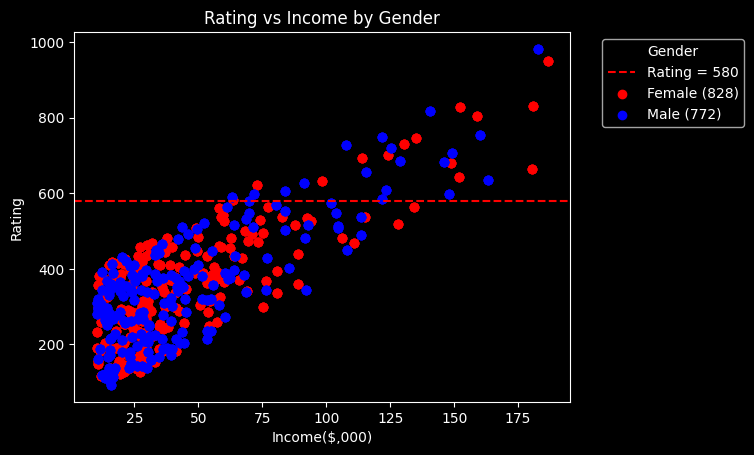

In [8]:
# Rating vs Income by Gender

# Get value counts for Gender
gender_counts = data['Gender'].value_counts()

# Define custom colors for each gender
colors = {'Male': 'blue', 'Female': 'red'}

# Drawing the horizontal line at y = 580
plt.axhline(y=580, color='r', linestyle='--', label='Rating = 580')

# Plot data with different colors for each gender
for gender in gender_counts.index:
    subset = data[data['Gender'] == gender]
    plt.scatter(subset['Income'], subset['Rating'], color=colors[gender], label=f'{gender} ({gender_counts[gender]})')

# Add a legend showing both labels and counts
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Income($,000)')
plt.ylabel('Rating')
plt.title('Rating vs Income by Gender')
plt.show()

Applying the gender filter reveals a fairly balanced distribution of males and females within the dataset.


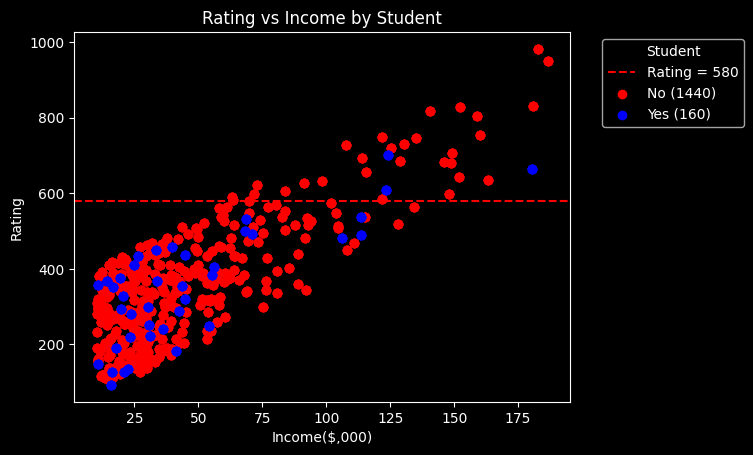

In [9]:
# Rating vs Income by Student

# Get value counts for Student
student_counts = data['Student'].value_counts()

# Define custom colors for each Student
colors = {'Yes': 'blue', 'No': 'red'}

# Drawing the horizontal line at y = 580
plt.axhline(y=580, color='r', linestyle='--', label='Rating = 580')

# Plot data with different colors for each Student
for student in student_counts.index:
    subset = data[data['Student'] == student]
    plt.scatter(subset['Income'], subset['Rating'], color=colors[student], label=f'{student} ({student_counts[student]})')

# Add a legend showing both labels and counts
plt.legend(title='Student', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Income($,000)')
plt.ylabel('Rating')
plt.title('Rating vs Income by Student')
plt.show()

In contrast, around 90% of the applicants are non-students.
This trend is also apparent above the 580 rating level, indicating that the bank is cautious about extending credit to students, who typically lack a regular income. Incorporating this feature into model training could significantly influence the machine learning outcomes


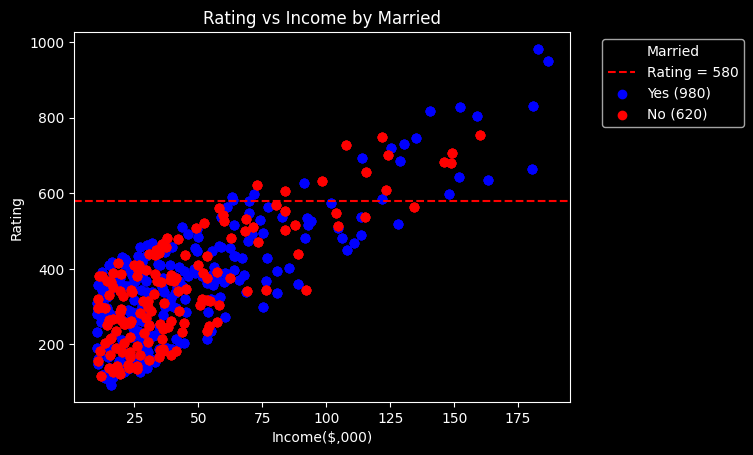

In [10]:
# Rating vs Income by Married

# Get value counts for Married
married_counts = data['Married'].value_counts()

# Define custom colors for each Married
colors = {'Yes': 'blue', 'No': 'red'}

# Drawing the horizontal line at y = 580
plt.axhline(y=580, color='r', linestyle='--', label='Rating = 580')

# Plot data with different colors for each Married
for married in married_counts.index:
    subset = data[data['Married'] == married]
    plt.scatter(subset['Income'], subset['Rating'], color=colors[married], label=f'{married} ({married_counts[married]})')

# Add a legend showing both labels and counts
plt.legend(title='Married', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Income($,000)')
plt.ylabel('Rating')
plt.title('Rating vs Income by Married')
plt.show()

This plot reveals a clear trend where married applicants tend to have higher incomes and better credit ratings.
For applicants with a credit rating above 580, married individuals show significantly higher incomes and ratings compared to unmarried applicants, whose incomes generally remain in the lower range between 10,000 and 50,000.
This insight is vital, not only for machine learning applications but also for empowering the bank to explore underlying trends more thoroughly, using the information for strategic decision-making, such as targeted marketing, loan approvals, and managemen.


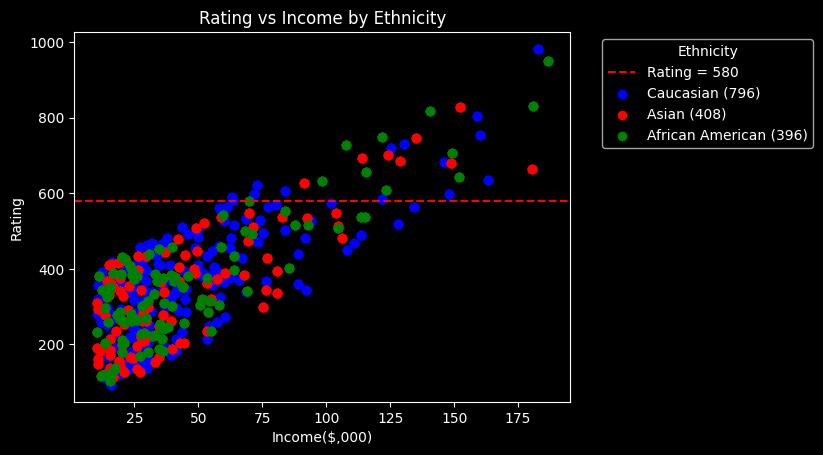

In [11]:
# Rating vs Income by Ethnicity

# Get value counts for Ethnicity
ethnicity_counts = data['Ethnicity'].value_counts()

# Define custom colors for each Ethnicity
colors = {'Caucasian': 'blue', 'Asian': 'red', 'African American': 'green'}

# Drawing the horizontal line at y = 580
plt.axhline(y=580, color='r', linestyle='--', label='Rating = 580')

# Plot data with different colors for each Ethnicity
for ethnicity in ethnicity_counts.index:
    subset = data[data['Ethnicity'] == ethnicity]
    plt.scatter(subset['Income'], subset['Rating'], color=colors[ethnicity], label=f'{ethnicity} ({ethnicity_counts[ethnicity]})')

# Add a legend showing both labels and counts
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Income($,000)')
plt.ylabel('Rating')
plt.title('Rating vs Income by Ethnicity')
plt.show()

This plot suggests that the bank's lending decisions are not influenced by ethnicity, as no clear pattern is present and the distribution across ethnic groups is uniform.


## Correlation Analysis

ID    Income     Limit    Rating     Cards       Age  \
ID         1.000000  0.037203  0.024172  0.021985 -0.036304  0.058603   
Income     0.037203  1.000000  0.792088  0.791378 -0.018273  0.175338   
Limit      0.024172  0.792088  1.000000  0.996880  0.010231  0.100888   
Rating     0.021985  0.791378  0.996880  1.000000  0.053239  0.103165   
Cards     -0.036304 -0.018273  0.010231  0.053239  1.000000  0.042948   
Age        0.058603  0.175338  0.100888  0.103165  0.042948  1.000000   
Education -0.001415 -0.027692 -0.023549 -0.030136 -0.051084  0.003619   
Balance    0.006064  0.463656  0.861697  0.863625  0.086456  0.001835   

           Education   Balance  
ID         -0.001415  0.006064  
Income     -0.027692  0.463656  
Limit      -0.023549  0.861697  
Rating     -0.030136  0.863625  
Cards      -0.051084  0.086456  
Age         0.003619  0.001835  
Education   1.000000 -0.008062  
Balance    -0.008062  1.000000

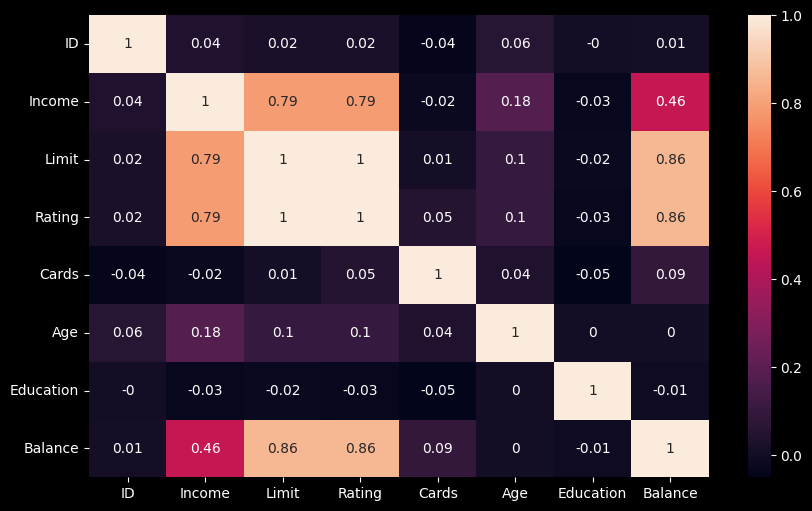

In [12]:
# Correlation Analysis to estalish whether there is any relationship between my numerical columns.
correl = data.corr(numeric_only = True)
display(correl)

# Use a seaborn heatmap to see this better
plt.figure(figsize=(10,6))
sns.heatmap(round(correl,2), annot = True)
plt.show()

In [13]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate correlations for numeric columns
correlation_matrix = numeric_data.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Display the result
print(correlation_matrix)

ID         ID         1.000000
Limit      Rating     0.996880
Balance    Rating     0.863625
           Limit      0.861697
Income     Limit      0.792088
Rating     Income     0.791378
Balance    Income     0.463656
Income     Age        0.175338
Age        Rating     0.103165
Limit      Age        0.100888
Balance    Cards      0.086456
Age        ID         0.058603
Rating     Cards      0.053239
Age        Cards      0.042948
Income     ID         0.037203
ID         Limit      0.024172
Rating     ID         0.021985
Cards      Limit      0.010231
ID         Balance    0.006064
Education  Age        0.003619
Balance    Age        0.001835
Education  ID        -0.001415
           Balance   -0.008062
Income     Cards     -0.018273
Education  Limit     -0.023549
           Income    -0.027692
           Rating    -0.030136
ID         Cards     -0.036304
Education  Cards     -0.051084
dtype: float64


<Figure size 500x300 with 0 Axes>

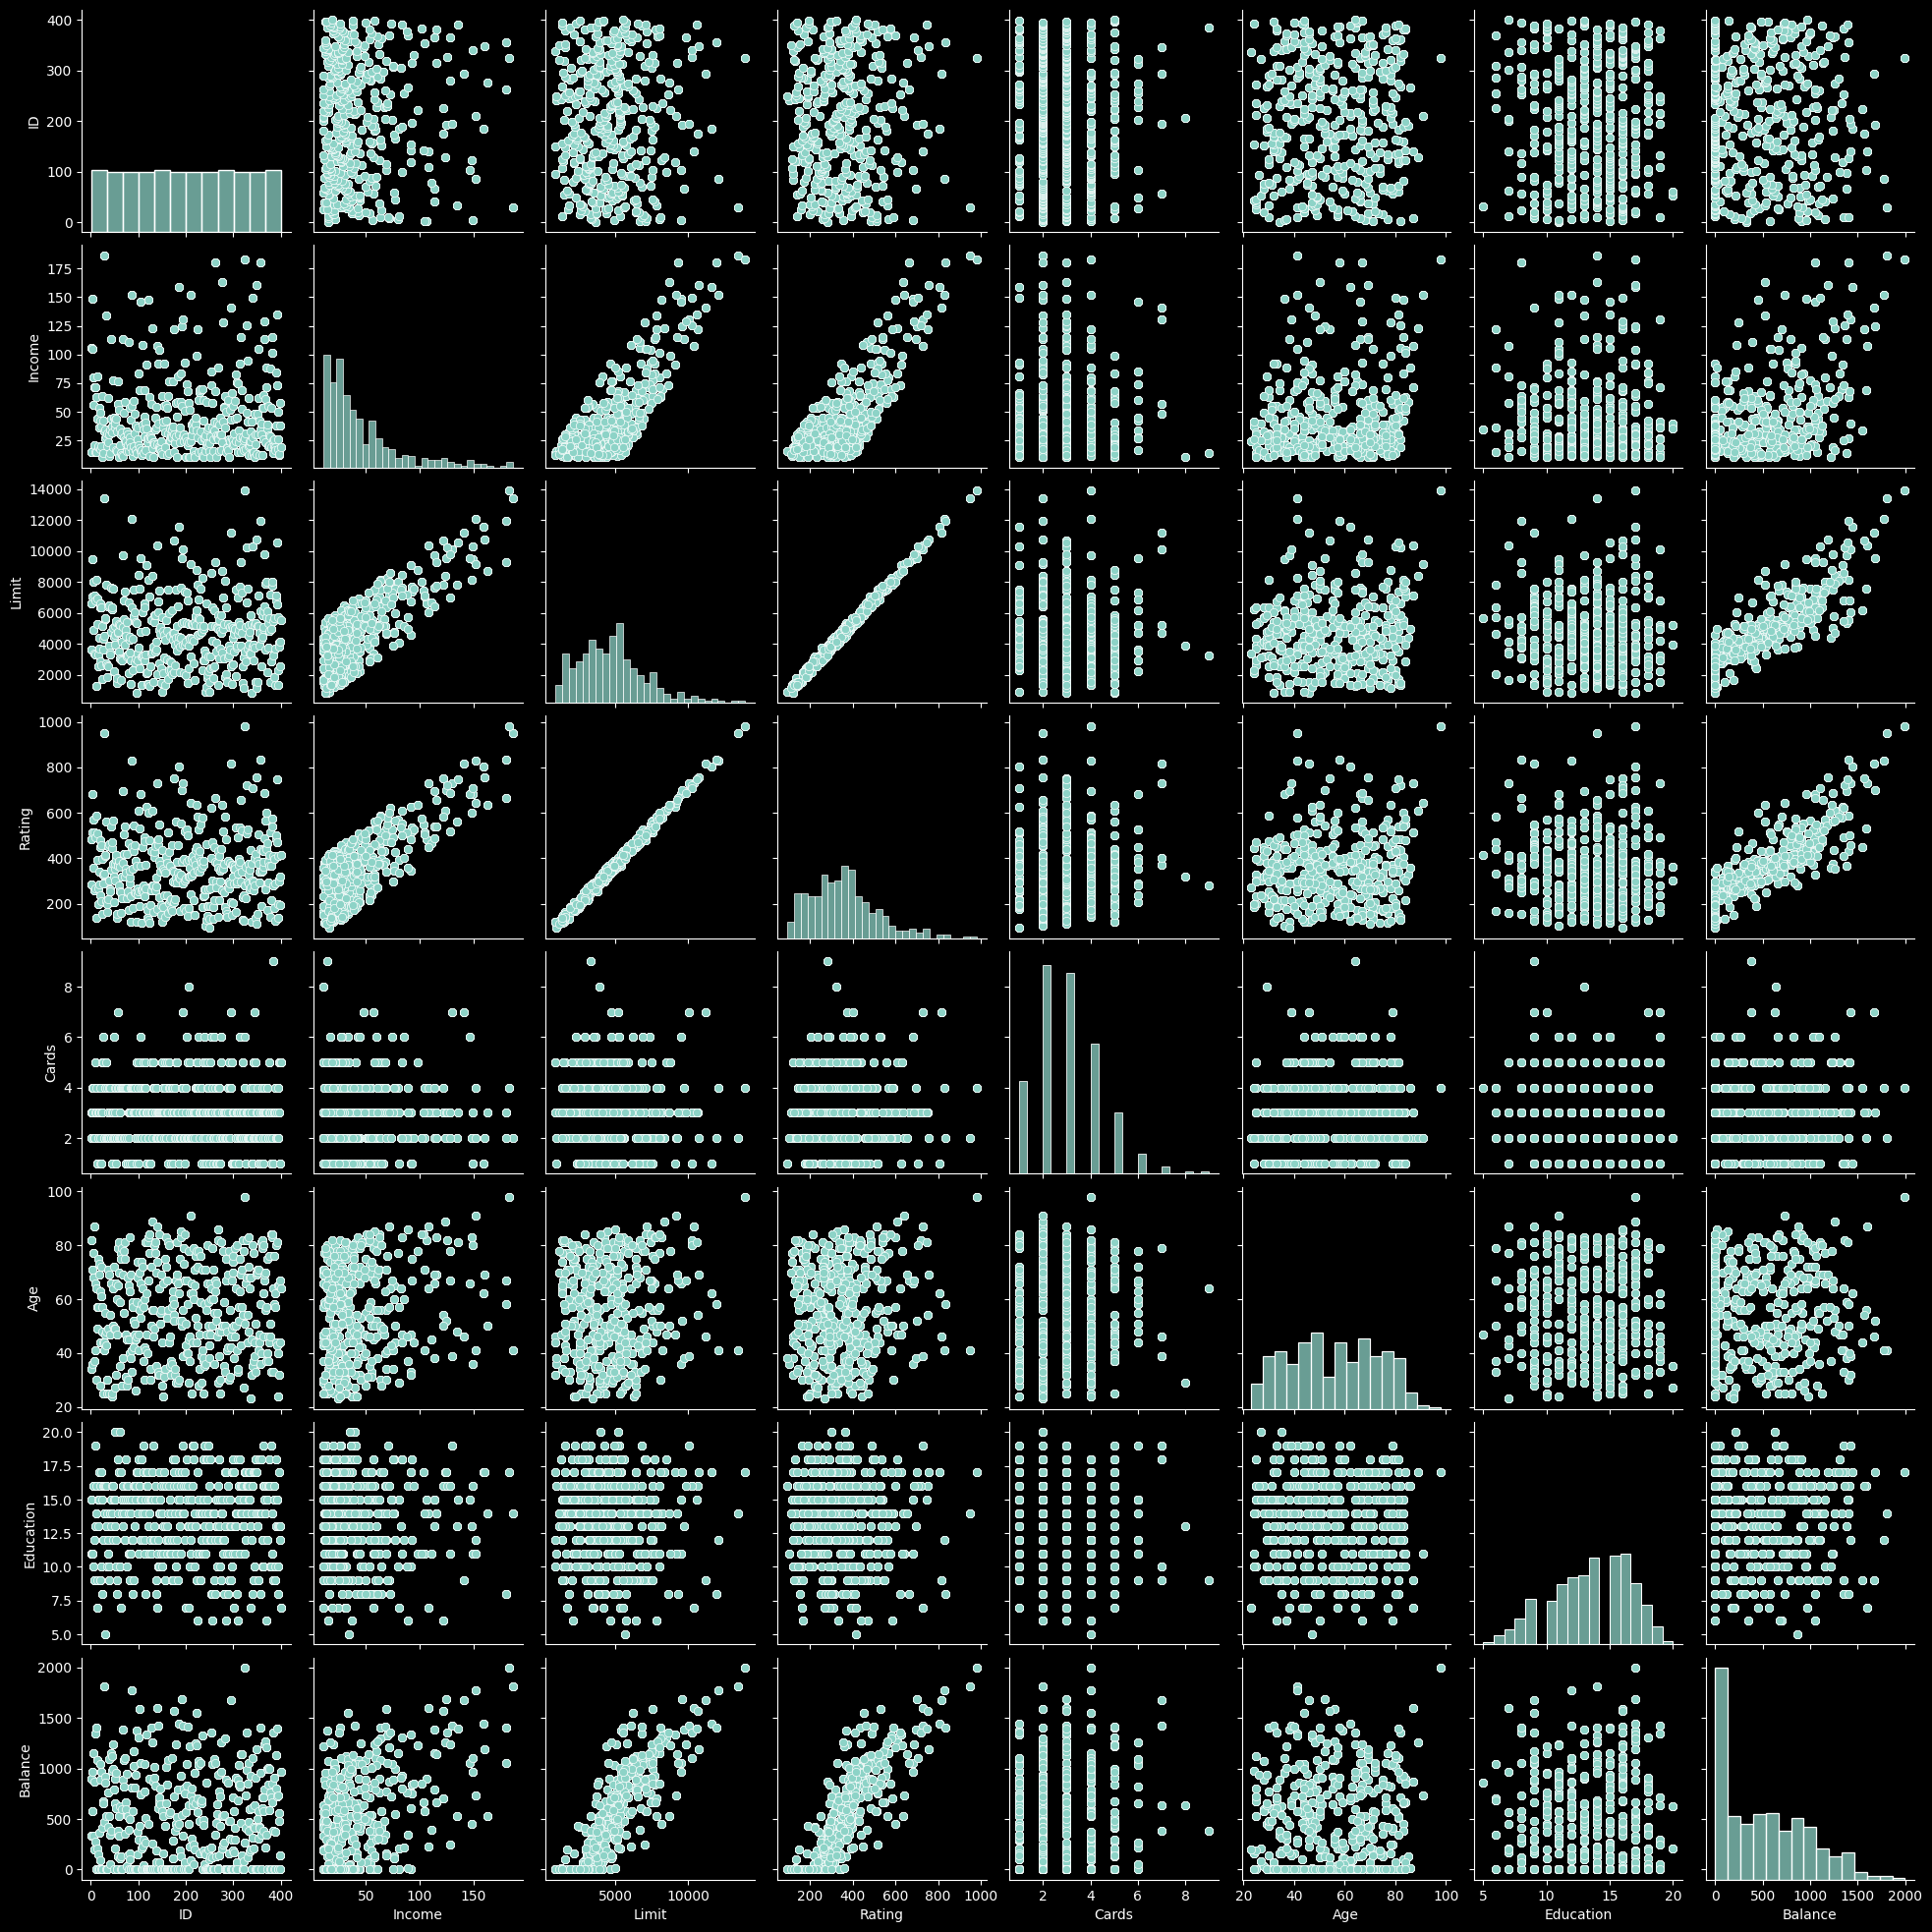

In [14]:
# Pairplot analysis
# A graphical way to see visually whether there is any relationship between the numerical columns.

plt.figure(figsize=(5,3))
sns.pairplot(data) #(data,hue='variety');
plt.show()

To aid in feature selection, I performed a correlational analysis of all numerical columns to identify factors influencing Ratings.<br>
By comparing Ratings with each numerical factor, I found that Income and Balance are the most correlated features driving Ratings.<br>
I excluded any features related to the bank’s scoring process like Rating and Limit as inputs for ML.<br>

# 4. Data Preparation

### Creating the Target column (Above_580)

In [15]:
# Create a new column that groups ratings into two categories: >= 580 and < 580 for machine learning
data['Above_580'] = pd.cut(data['Rating'], bins=[0, 580, float('inf')], labels=['0', '1'])
print("Creating Target column (Above_580) :")
data.head()

Creating Target column (Above_580) :


ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance Above_580  
0  Caucasian      333         0  
1      Asian      903         0  
2      Asian      580         0  
3      Asian      964         1  
4  Caucasian      331         0

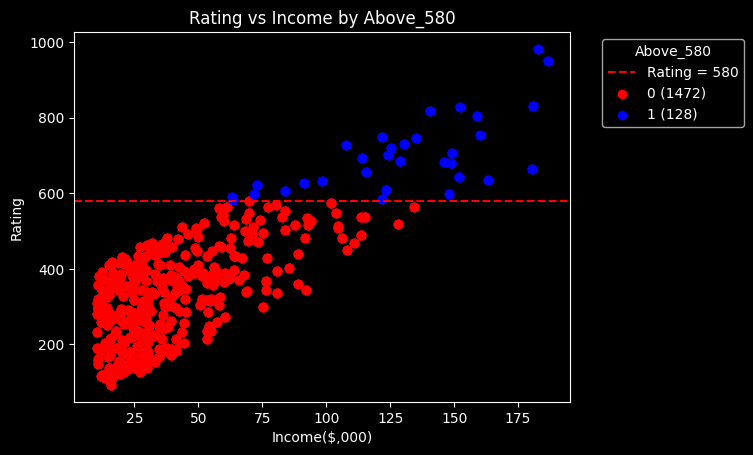

In [16]:
# Visualising the target column "Above_580"

# Get value counts for Above_580
above_580_counts = data['Above_580'].value_counts()

# Define custom colors for each Above_580
colors = {'1': 'blue', '0': 'red'}

# Drawing the horizontal line at y = 580
plt.axhline(y=580, color='r', linestyle='--', label='Rating = 580')

# Plot data with different colors for each Above_580
for above_580 in above_580_counts.index:
    subset = data[data['Above_580'] == above_580]
    plt.scatter(subset['Income'], subset['Rating'], color=colors[above_580], label=f'{above_580} ({above_580_counts[above_580]})')

# Add a legend showing both labels and counts
plt.legend(title='Above_580', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Income($,000)')
plt.ylabel('Rating')
plt.title('Rating vs Income by Above_580')
plt.show()

<Figure size 500x300 with 0 Axes>

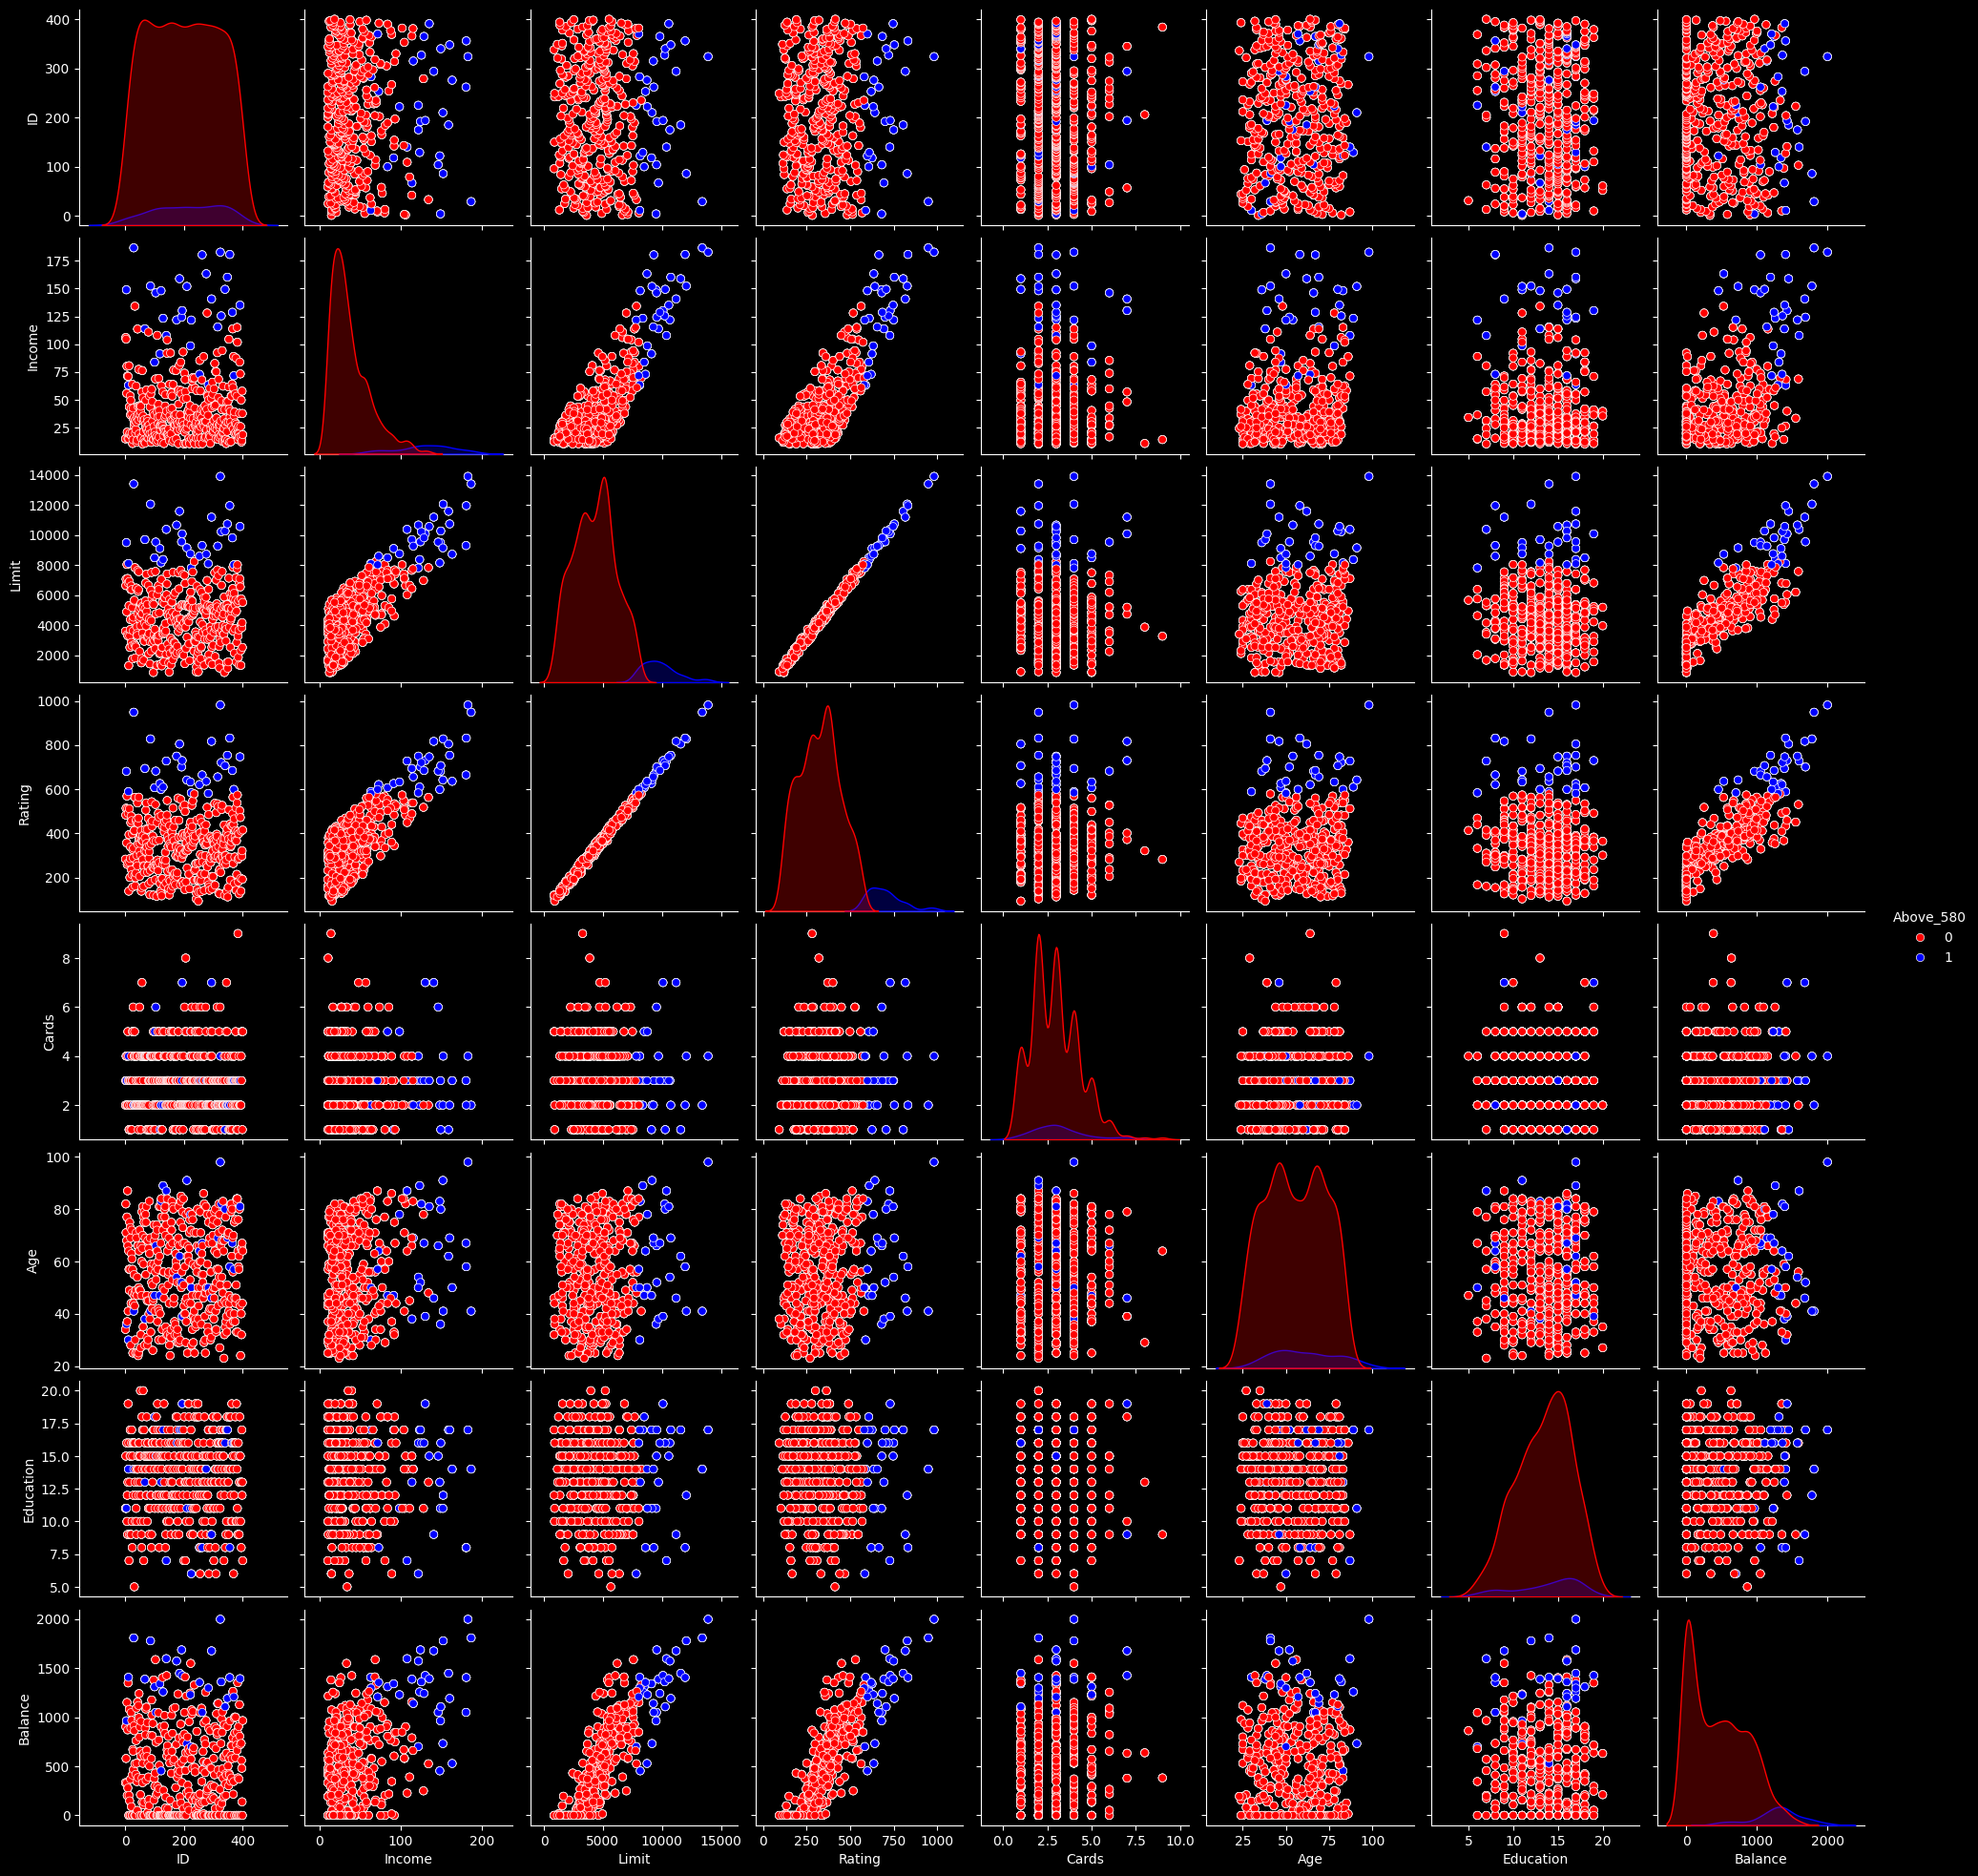

In [17]:
# Pairplot analysis with Distributions of applicants Above and Below 580 Rating
plt.figure(figsize=(5,3))
sns.pairplot(data, hue='Above_580', palette={'0': 'red', '1': 'blue'})
plt.show()

### Label Encoding

*Use Label Encoding if there’s a meaningful order (e.g., balance ranges). Use One-Hot Encoding if the categories are distinct and unordered. Both methods convert categorical text data into numerical form, enabling it to be used in machine learning models. Which one you use depends on whether the different categories have an inherent order or are simply different classes.*

In [18]:
# Select columns to label encode (only categorical columns)
columns_to_encode = ['Gender', 'Student', 'Married', 'Ethnicity']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Check the result
print("After Label Encoding :") # Confusion Matrix
display(data.head())

After Label Encoding :


ID   Income  Limit  Rating  Cards  Age  Education  Gender  Student  \
0   1   14.891   3606     283      2   34         11       1        0   
1   2  106.025   6645     483      3   82         15       0        1   
2   3  104.593   7075     514      4   71         11       1        0   
3   4  148.924   9504     681      3   36         11       0        0   
4   5   55.882   4897     357      2   68         16       1        0   

   Married  Ethnicity  Balance Above_580  
0        1          2      333         0  
1        1          1      903         0  
2        0          1      580         0  
3        0          1      964         1  
4        1          2      331         0

## Feature Selection

*"Feature engineering is a crucial step in improving the performance of machine learning models. By creating new features or transforming existing ones, you can help the model better capture relationships within the data."*

*It's important to note that the types and number of features are limited to this specific dataset and are not exhaustive. In practice, additional features could further enhance the machine learning model, such as information pertaining to Payment History, Car and home ownership, Mortgages and loans, Spending patterns reflected in account balances, Loan purpose, Number of loan applications, Residential type and area etc., which are not present in this dataset.*


In [19]:
# Selecting the predictors and target
X = data.drop(['Above_580','ID','Limit','Rating','Cards'], axis = 1)  # taking all columns as input except ...
Y = data['Above_580']   # taking only Above_580 column as the target

In [20]:
# Verifying the features and target variables
print("Feature Selection :")
display(X.head())
display(Y.head())

Feature Selection :


Income  Age  Education  Gender  Student  Married  Ethnicity  Balance
0   14.891   34         11       1        0        1          2      333
1  106.025   82         15       0        1        1          1      903
2  104.593   71         11       1        0        0          1      580
3  148.924   36         11       0        0        0          1      964
4   55.882   68         16       1        0        1          2      331

0    0
1    0
2    0
3    1
4    0
Name: Above_580, dtype: category
Categories (2, object): ['0' < '1']

## Splitting the data to train and test sets

In [22]:
# Using stratify during the split

# Split the data into train and test
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify = Y)

# in this our main data is split into train and test
# the attribute test_size=0.25 splits the data into 75% and 25% ratio. train=75% and test=25%
# We have set the reproduceability using random_state
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (1200, 8)
Test Shape (400, 8)


In [23]:
# Printing the total counts of unique values in the Y_train
print(Y_train.value_counts())
print()  # printing a blank line for spacing

# Let's divide these values by 300 (total rows in training data) to get percentage.
print((Y_train.value_counts() / 1200) * 100)   # Multiply with 100 to get percentage
print()

# Printing the total counts of unique values in the Y_test
print(Y_test.value_counts())
print()

# Let's divide these values by 38 (total rows in testing data) to get percentage.
print((Y_test.value_counts() / 400) * 100)   # Multiply with 100 to get percentage

Above_580
0    1104
1      96
Name: count, dtype: int64

Above_580
0    92.0
1     8.0
Name: count, dtype: float64

Above_580
0    368
1     32
Name: count, dtype: int64

Above_580
0    92.0
1     8.0
Name: count, dtype: float64


# 5. Data Modelling and Evaluation

*In machine learning and data science, data modeling refers to building predictive models that learn patterns from data to make informed decisions or predictions.*
It is generally recommended to experiment with several models and use cross-validation to identify which works best for a specific dataset.


## Logistic Regression
*Used in machine learning to model the probability of a binary outcome based on one or more predictor variables.* Works well when the relationship between features and the target variable is linear.

Accuracy score Logistic Regression : 98 %

Confusion Matrix : Logistic Regression


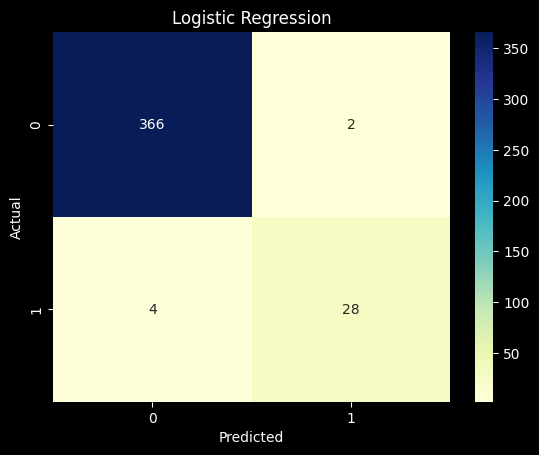


Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       368
           1       0.93      0.88      0.90        32

    accuracy                           0.98       400
   macro avg       0.96      0.93      0.95       400
weighted avg       0.98      0.98      0.98       400


Percentage of negative and positive class distribution :
Above_580
0    1472
1     128
Name: count, dtype: int64
Above_580
0    92.0
1     8.0
Name: count, dtype: float64



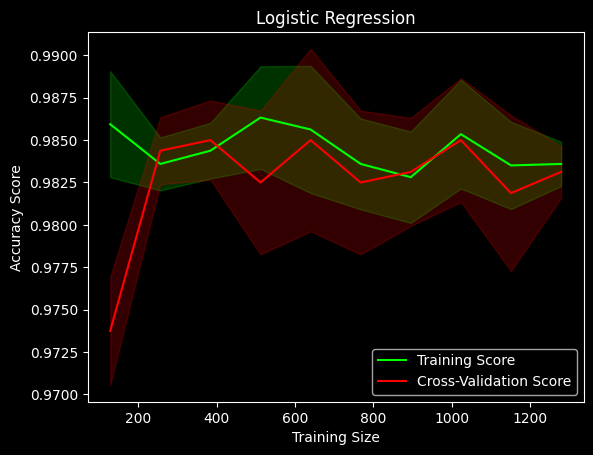


AUC: 1.00


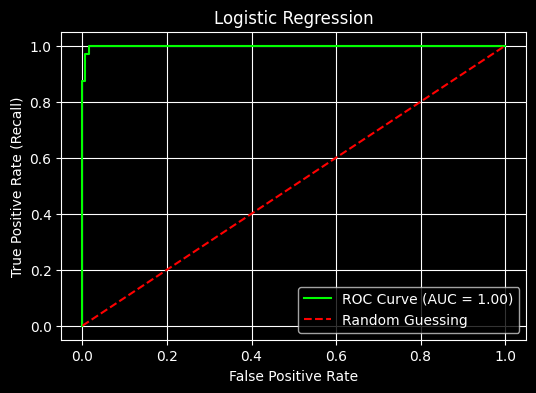

In [24]:
# Create a logistic regression model
log = LogisticRegression() # Model Selection
log.fit(X_train,Y_train) # Train
logPrediction = log.predict(X_test) # Test

# Accuracy Score
logAccuracy = metrics.accuracy_score(logPrediction,Y_test) 
print("Accuracy score Logistic Regression :", int(logAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix : Logistic Regression") 
logM = metrics.confusion_matrix(Y_test, logPrediction) 
sns.heatmap(logM, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()
print()

# Classification Report
print("Logistic Regression") 
print(metrics.classification_report(Y_test, logPrediction)) 
print()

# Percentage of negative and positive class distribution
print("Percentage of negative and positive class distribution :")
print(data['Above_580'].value_counts())
print((data['Above_580'].value_counts() / 1600) * 100)
print()

# Generate learning curve for logistic regression
train_sizes, train_scores, test_scores = learning_curve(
    log, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for logistic regression
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = log.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Classification Report :** The Recall for positive class is relatively low at 69%, i.e. the model is better at predicting the negative class (Not-credit Worthy) than the positive class (Credit Worthy). This is probably due to an imbalanced dataset. <br>

**Learning Curve :** No Overfitting occurs as the cross-validation score (green) is close to the training score (blue), which suggests that the model generalizes well to unseen data. No Underfitting as both the training and cross-validation accuracy scores are high, meaning the model is learning the underlying patterns in the data. At the beginning, with fewer training samples (around 200-400), there is some fluctuation, indicating that the model might not yet have enough data to learn reliably. As the training size increases, the training and validation scores converge around 98.5%, indicating stable performance.

### Hyperparameter Tuning using Randomized Search

*Hyperparameter tuning is essential for optimizing logistic regression models. Both Grid Search and Randomized Search are effective strategies, with the latter being particularly useful for larger hyperparameter spaces. Adjusting these parameters can help improve the accuracy and generalizability of your logistic regression model.*

In [25]:
# Define the hyperparameter distribution for log = LogisticRegression()
log = LogisticRegression()
param_dist = {
    'C': uniform(0.001, 999.999),  # C values ranging from 0.001 to 1001 (inclusive)
    'penalty': ['l1', 'l2'], # Regularization types: L1 (Lasso) and L2 (Ridge)
    'solver': ['liblinear', 'lbfgs'],  # Solvers to be used: 'liblinear' for smaller datasets with L1 penalty and 'lbfgs' for larger datasets
    'max_iter': [100, 200, 300] # Maximum iterations for convergence
}
# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=log, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=5, verbose=2)
# Fit the model
random_search.fit(X_train, Y_train)
# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=374.54074430724364, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=374.54074430724364, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=374.54074430724364, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=374.54074430724364, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=374.54074430724364, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=779.691220581769, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=779.691220581769, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=779.691220581769, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=779.691220581769, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=779.691220581769, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=155.995364341682

*Applying regularization techniques (L1) to prevent overfitting and enhance generalization by penalizing larger coefficients.
Regularization methods help maintain a balance between bias and variance.*

Accuracy score Logistic Regression (Best) : 100 %

Confusion Matrix Logistic Regression (Best) :


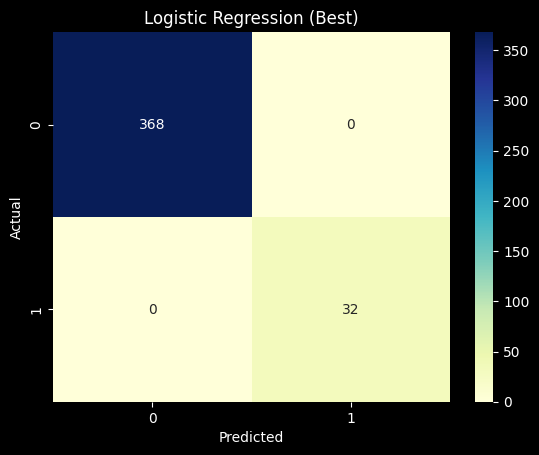


Logistic Regression (Best)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        32

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




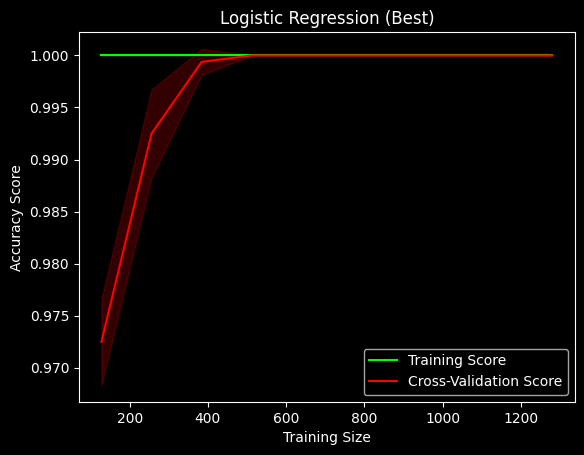


AUC: 1.00


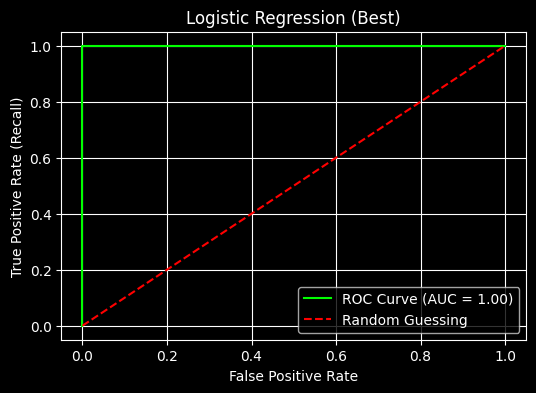

In [26]:
# Create a logistic regression model with the best hyperparameters
log = LogisticRegression(
    C=265.0003177707885, 
    max_iter=100, 
    penalty='l1', 
    solver='liblinear'
)
log.fit(X_train,Y_train)
logPrediction = log.predict(X_test)

# Accuracy Score
logAccuracy = metrics.accuracy_score(logPrediction,Y_test) 
print("Accuracy score Logistic Regression (Best) :", int(logAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Logistic Regression (Best) :") 
logM = metrics.confusion_matrix(Y_test, logPrediction) 
sns.heatmap(logM, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression (Best)')
plt.show()
print()

# Classification Report
print("Logistic Regression (Best)") 
print(metrics.classification_report(Y_test, logPrediction)) 
print()

# Generate learning curve for logistic regression best model configuration
train_sizes, train_scores, test_scores = learning_curve(
    log, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Logistic Regression (Best)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for logistic regression best model configuration
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = log.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logistic Regression (Best)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score starts high and remains higher than the cross-validation score, but the gap between them decreases as the training size increases. Since the training and cross-validation scores converge as the training size increases, it suggests that the model is not overfitting significantly.

## k-Nearest Neighbor

*"KNN" is a non-parametric algorithm that makes predictions by comparing new input data to a fixed number of the closest training examples (neighbors). Training Accuracy is typically high, since it can perfectly memorize the training data, especially if K = 1. However, a high K value can smooth out the predictions, reducing training accuracy but possibly improving generalization.*


Accuracy score k-Nearest Neighbor : 98 %

Confusion Matrix k-Nearest Neighbor :


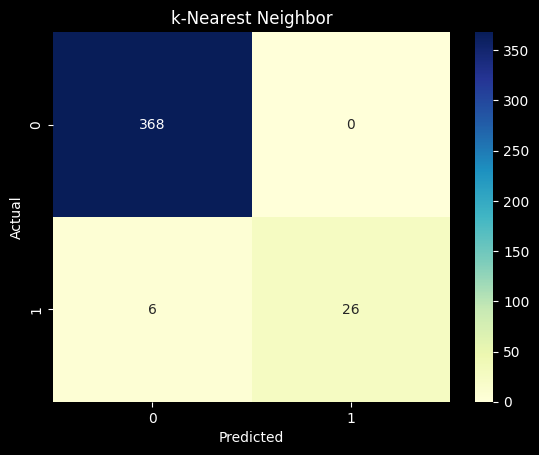


k-Nearest Neighbor :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       368
           1       1.00      0.81      0.90        32

    accuracy                           0.98       400
   macro avg       0.99      0.91      0.94       400
weighted avg       0.99      0.98      0.98       400




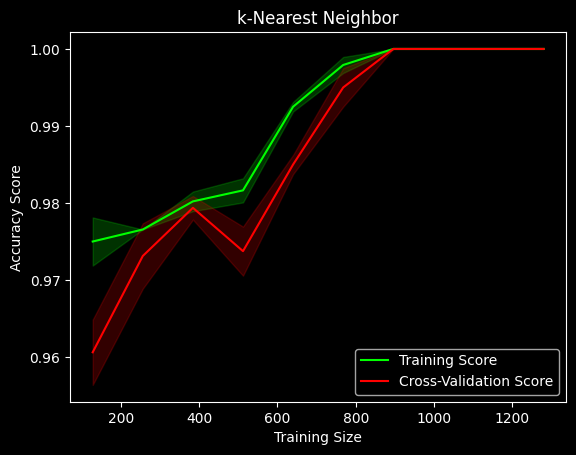


AUC: 1.00


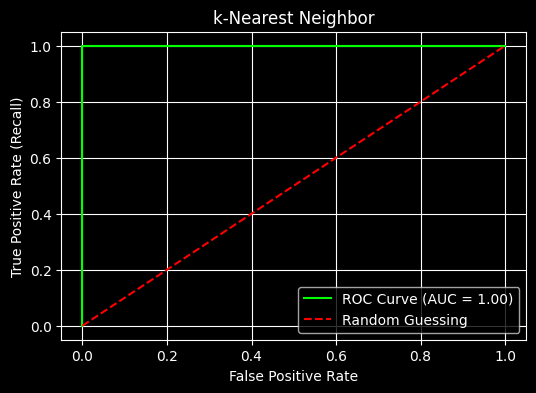

In [27]:
# Create a k-Nearest Neighbor model
knn = KNeighborsClassifier() # Model Selection # n_neighbors=5 by default
knn.fit(X_train,Y_train) # Train
knnPrediction = knn.predict(X_test) # Test
print()

# Accuracy Score
knnAccuracy = metrics.accuracy_score(knnPrediction,Y_test) 
print("Accuracy score k-Nearest Neighbor :", int(knnAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix k-Nearest Neighbor :")
knn = metrics.confusion_matrix(Y_test, knnPrediction) 
sns.heatmap(knn, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('k-Nearest Neighbor')
plt.show()
print()

# Classification Report
print("k-Nearest Neighbor :") 
print(metrics.classification_report(Y_test, knnPrediction)) 
print()

# Generate learning curve for k-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('k-Nearest Neighbor')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for k-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = knn.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('k-Nearest Neighbor')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Classification Report :** The Recall for positive class is excellent at 100%.<br>

**Learning Curve :**
Training Score line starts high and remains consistently above the cross-validation score, indicating that the model performs well on the training data. Cross-Validation line is lower than the training score but increases with the training size, suggesting that the model’s performance on unseen data improves as more training data is used. Gap between the training and cross-validation scores indicates potential overfitting. The model performs better on the training data than on the validation data. As the training size increases, the cross-validation score approaches the training score, indicating improved generalization.

### Hyperparameter Tuning using Randomized Search

In [28]:
# Define the hyperparameter distribution to search
knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': list(range(1, 31)),  # Try values from 1 to 30
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithms to compute neighbors
    'p': [1, 2]  # Power parameter for Minkowski distance
}
# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42
)
random_search.fit(X_train, Y_train)
# Print the best hyperparameters
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'weights': 'distance', 'p': 1, 'n_neighbors': 17, 'metric': 'euclidean', 'algorithm': 'auto'}



Accuracy score k-Nearest Neighbor (Best) : 100 %

Confusion Matrix k-Nearest Neighbor (Best) :


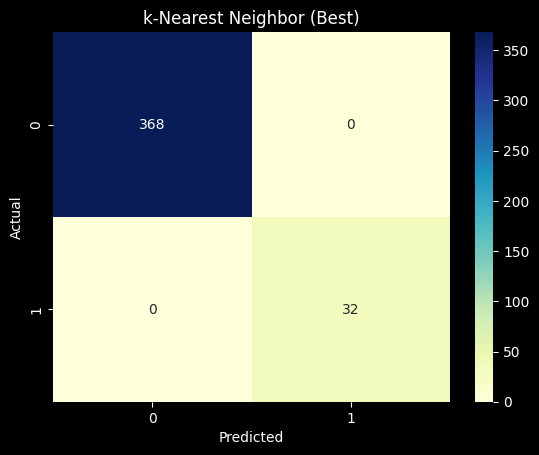


k-Nearest Neighbor (Best)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        32

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




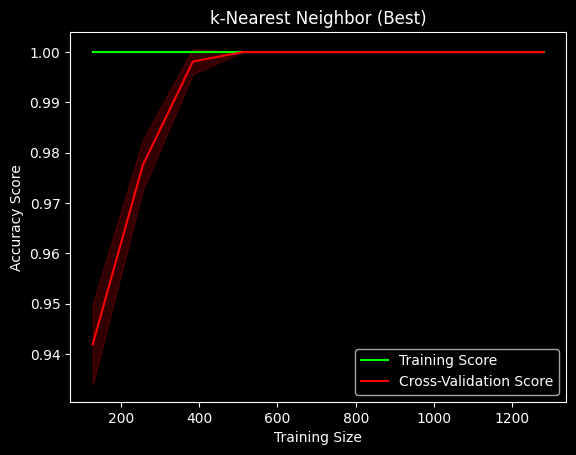


AUC: 1.00


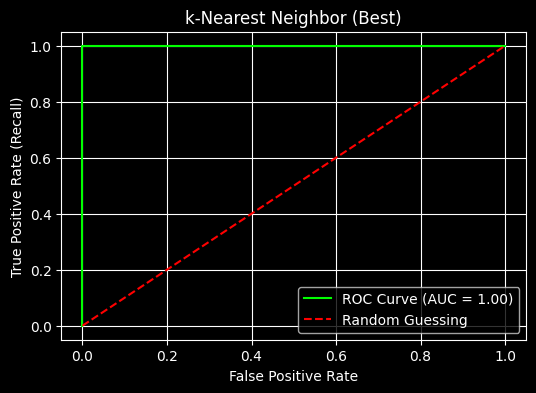

In [29]:
# Create a k-Nearest Neighbor model with best hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=17,
    weights='distance',  # 'distance' should be a string
    metric='euclidean',  # 'euclidean' should be a string
    algorithm='auto',
    p=1
)
knn.fit(X_train,Y_train) # Train
knnPrediction = knn.predict(X_test) # Test

# Accuracy Score
knnAccuracy = metrics.accuracy_score(knnPrediction,Y_test) 
print()
print("Accuracy score k-Nearest Neighbor (Best) :", int(knnAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix k-Nearest Neighbor (Best) :") 
knnM = metrics.confusion_matrix(Y_test, knnPrediction) 
sns.heatmap(knnM, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('k-Nearest Neighbor (Best)')
plt.show()
print()

# Classification Report
print("k-Nearest Neighbor (Best)") 
print(metrics.classification_report(Y_test, knnPrediction)) 
print()

# Generate learning curve for k-Nearest Neighbor with best parameters
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('k-Nearest Neighbor (Best)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for k-Nearest Neighbor with best parameters
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = knn.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('k-Nearest Neighbor (Best)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score starts high and remains relatively stable as the training size increases, indicating that the model fits the training data well. 
The cross-validation score improves with more training data but then plateaus, suggesting that adding more data does not significantly improve the model’s accuracy beyond a certain poin .
The shaded area around the red line represents variability or confidence intervals for the cross-validation scores, indicating some uncertainty in the model’s performance on unseen data.

## Support Vector Machine

***SVM** finds a hyperplane or a decision boundary that best separates the data points into different classes by maximizing the margin between classes. The support vectors are the data points closest to the decision boundary. It is less prone to overfitting because of the margin maximization principle, especially when using regularization and appropriate kernel selection.*


Accuracy score Support Vector Machine : 97 %

Confusion Matrix Support Vector Machine :


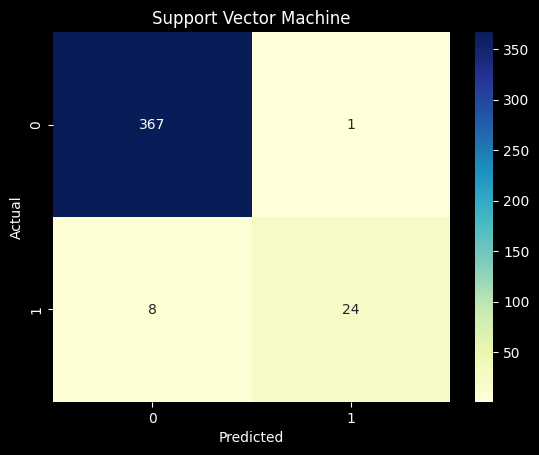


Support Vector Machine
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       368
           1       0.96      0.75      0.84        32

    accuracy                           0.98       400
   macro avg       0.97      0.87      0.91       400
weighted avg       0.98      0.98      0.98       400




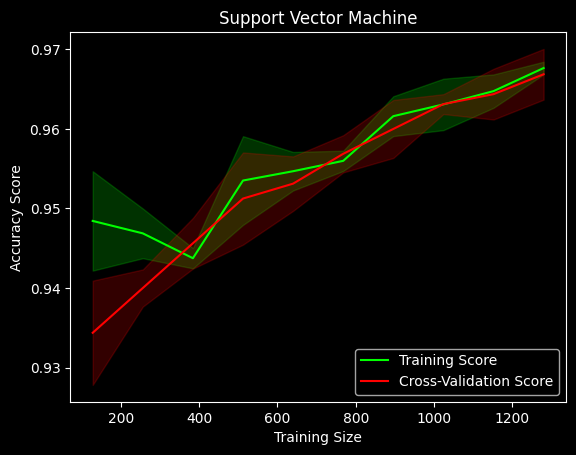


AUC: 1.00


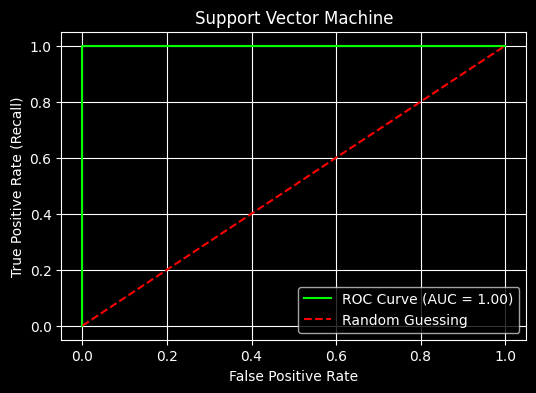

In [30]:
# Create a Support Vector Machine model
svc = SVC(probability=True) # Model Selection
svc.fit(X_train,Y_train) # Train
svcPrediction = svc.predict(X_test) # Test
print()

# Accuracy Score
svcAccuracy = metrics.accuracy_score(svcPrediction,Y_test) 
print("Accuracy score Support Vector Machine :", int(svcAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Support Vector Machine :") 
svc = metrics.confusion_matrix(Y_test, svcPrediction) 
sns.heatmap(svc, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine')
plt.show()
print()

# Classification Report
print("Support Vector Machine") 
print(metrics.classification_report(Y_test, svcPrediction)) 
print()

# Generate learning curve for Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    svc, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Support Vector Machine')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,Y_train) # Train
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = log.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Support Vector Machine')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Classification Report :** The Recall for positive class is at 72%, slightly better than logistic regression. <br>

**Learning Curve :** 
The training score increases as the training size increases, indicating that the model performs better with more data 
The training score starts high and remains relatively stable, suggesting that the model fits the training data wel ):
The cross-validation score also improves with more training data, but it starts lower than the training sc re.
The gap between the training and cross-validation scores decreases as the training size increases, indicating reduced overfit Area:
The shaded area between the two lines represents the variance in scores during cross-validation. A smaller shaded area at larger training sizes suggests more consistent model performance.

### Hyperparameter Tuning using Randomized Search

In [31]:
# Define the hyperparameter distribution to search
svc = SVC()
param_dist = {
    'C': np.logspace(-3, 3, 10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'degree': [2, 3, 4],  # Degree for poly kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function for 'poly' and 'sigmoid'
    'probability' : [True]
}
# Set up the random search with 5-fold cross-validation
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# Fit the random search model to the training data
random_search.fit(X_train, Y_train)
# Print the best hyperparameters
print("Best hyperparameters found:", random_search.best_params_)

Best hyperparameters found: {'probability': True, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 0.0, 'C': 10.0}



Accuracy score Support Vector Machine (Best) : 100 %

Confusion Matrix Support Vector Machine (Best) :


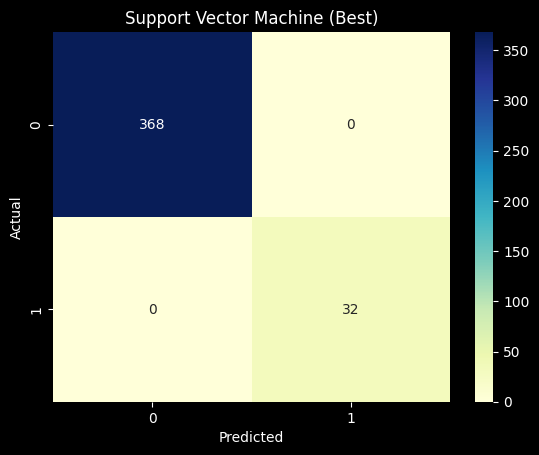


Support Vector Machine (Best)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        32

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




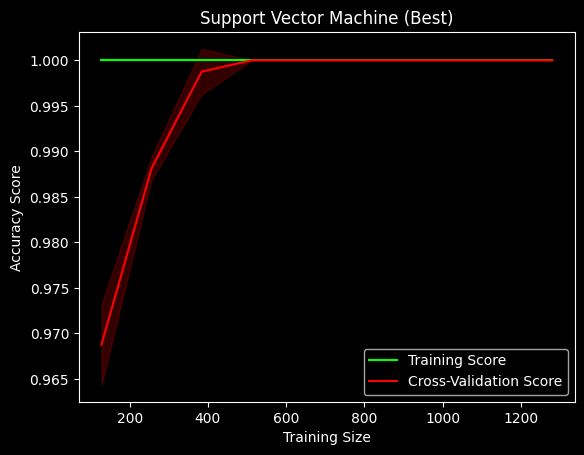


AUC: 1.00


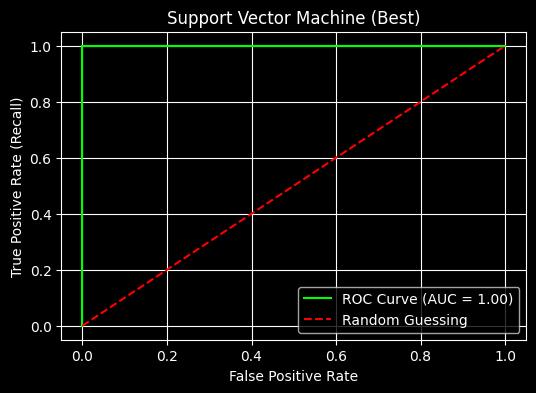

In [32]:
# Create a Support Vector Machine model with best hyperparameters
svc = SVC(
    C=10,
    kernel='poly',  # 'distance' should be a string
    degree=4,  # 'euclidean' should be a string
    gamma='auto',
    coef0=0,
    probability=True
)
svc.fit(X_train,Y_train) # Train
svcPrediction = svc.predict(X_test) # Test

# Accuracy Score
svcAccuracy = metrics.accuracy_score(svcPrediction,Y_test) 
print()
print("Accuracy score Support Vector Machine (Best) :", int(knnAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Support Vector Machine (Best) :") 
svcM = metrics.confusion_matrix(Y_test, svcPrediction) 
sns.heatmap(svcM, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine (Best)')
plt.show()
print()

# Classification Report
print("Support Vector Machine (Best)") 
print(metrics.classification_report(Y_test, svcPrediction)) 
print()

# Generate learning curve for Support Vector Machine with best parameters
train_sizes, train_scores, test_scores = learning_curve(
    svc, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Support Vector Machine (Best)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Support Vector Machine with best parameters
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = svc.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Support Vector Machine (Best)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Classification Report :** The Recall for positive class is at 72%, slightly better than logistic regression. <br>

**Learning Curve :**
This learning curve shows a relatively good fit with minimal signs of overfitting or underfitting. 

Training Score (blue line) - The model's performance on the training set is steadily improving as more data is used. It starts slightly lower but increases consistently, approaching 97% accuracy.
Cross-Validation Score (green line) reflects how well the model generalizes to unseen data. It also shows an upward trend, closely following the training score. The gap between training and cross-validation scores is small, indicating that the model is not overfitting significantly. The shaded areas around the lines represent the variance (uncertainty) in the scores. As the training size increases, the variance decreases, which is a good sign of model stability.

Overall, this curve suggests that the model is learning well without major overfitting or underfitting issues, and it is likely to perform consistently on new data.

## Decision Tree Classifier

*A **decision tree** is a single model that recursively splits the data based on feature values to create a tree structure. They tend to overfit the data, especially when they are deep, because they can perfectly memorize the training data. This leads to high accuracy on the training set but can result in poor generalization to unseen data.*


Accuracy score Decision Tree : 100 %

Confusion Matrix :


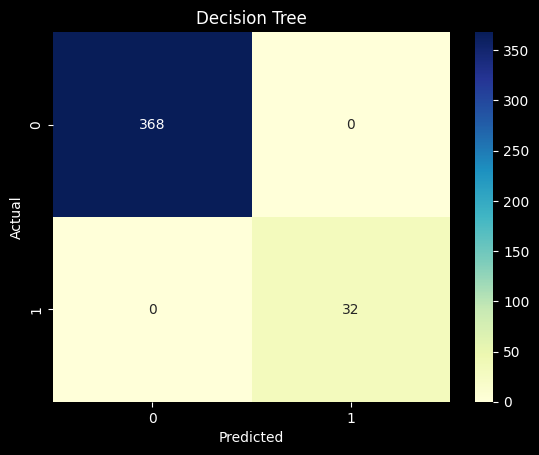


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        32

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




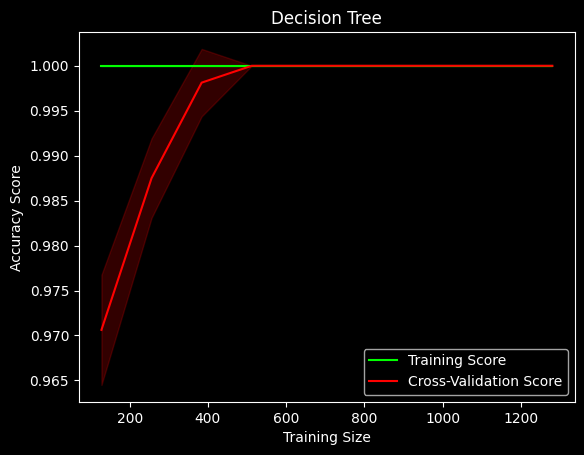


AUC: 1.00


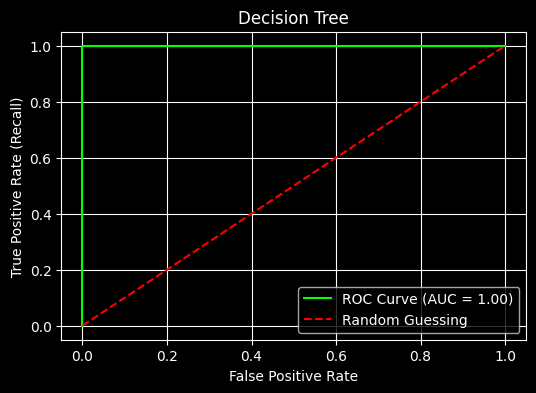

In [33]:
# Create a Decision Tree Model
tree = DecisionTreeClassifier() # Model Selection
tree.fit(X_train,Y_train) # Train
treePrediction = tree.predict(X_test) # Test
print()

# Accuracy Score
treeAccuracy = metrics.accuracy_score(treePrediction,Y_test) 
print("Accuracy score Decision Tree :", int(treeAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix :") 
tree = metrics.confusion_matrix(Y_test, treePrediction) 
sns.heatmap(tree, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')
plt.show()
print()

# Classification Report
print("Decision Tree") 
print(metrics.classification_report(Y_test, treePrediction)) 
print()

# Generate learning curve for Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    tree, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy') # Perform 5-fold cross-validation
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Decision Tree')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train) # Train
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = tree.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score starts high, indicating that the model fits the training data very well. 
The cross-validation score starts lower but increases with more training data, eventually plateauing as it approaches the training score lin .
The gap between the training and cross-validation scores narrows as the training size increases, indicating reduced overfitti ea:
The shaded area between the two lines represents the variance in scores during cross-validation. A smaller shaded area at larger training sizes suggests more consistent model performance.

### Hyperparameter Tuning using Randomized Search

In [34]:
# Define the hyperparameter distribution to search
tree = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None] + list(range(1, 21)),  # Maximum depth of the tree
    'min_samples_split': range(2, 21),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 21),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}
# Set up the random search with 5-fold cross-validation
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# Fit the random search model to the training data
random_search.fit(X_train, Y_train)
# Print the best hyperparameters
print("Best hyperparameters found:", random_search.best_params_)

Best hyperparameters found: {'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}



Accuracy score Decision Tree (Best) : 99 %

Confusion Matrix Decision Tree (Best) :


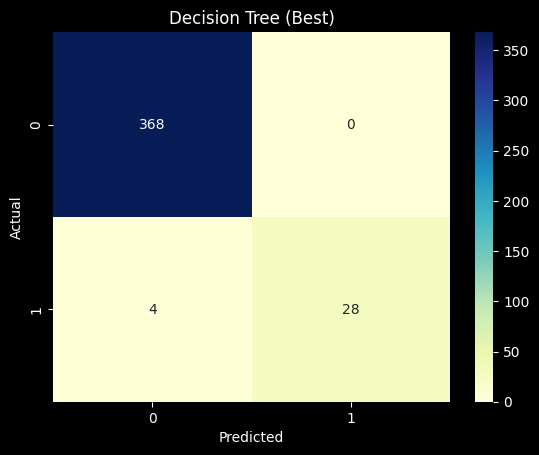


Decision Tree (Best)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       368
           1       1.00      0.88      0.93        32

    accuracy                           0.99       400
   macro avg       0.99      0.94      0.96       400
weighted avg       0.99      0.99      0.99       400




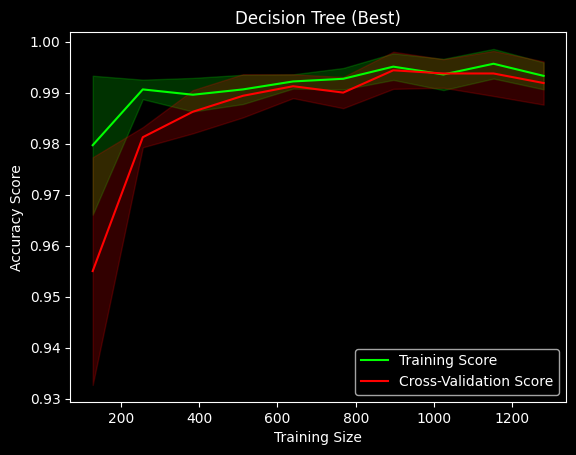


AUC: 1.00


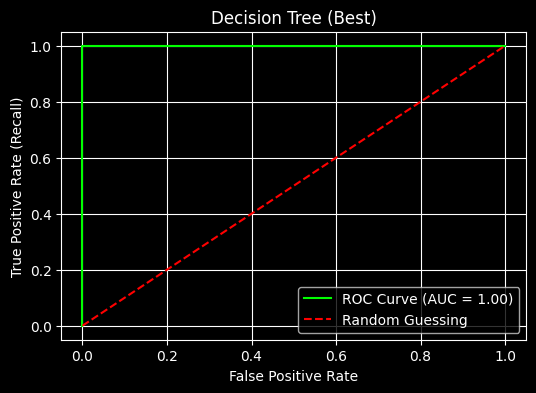

In [35]:
# Create a Decision Tree model with best hyperparameters
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,  # 'distance' should be a string
    min_samples_split=11,  # 'euclidean' should be a string
    min_samples_leaf=1,
    max_features='log2'
)
tree.fit(X_train,Y_train) # Train
treePrediction = tree.predict(X_test) # Test

# Accuracy Score
treeAccuracy = metrics.accuracy_score(treePrediction,Y_test) 
print()
print("Accuracy score Decision Tree (Best) :", int(treeAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Decision Tree (Best) :") 
treeM = metrics.confusion_matrix(Y_test, treePrediction) 
sns.heatmap(treeM, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree (Best)')
plt.show()
print()

# Classification Report
print("Decision Tree (Best)") 
print(metrics.classification_report(Y_test, treePrediction)) 
print()

# Generate learning curve for Decision Tree with best parameters
train_sizes, train_scores, test_scores = learning_curve(
    tree, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Decision Tree (Best)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Decision Tree with best parameters
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = svc.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Decision Tree (Best)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score remains relatively constant across the training size, indicating that the model fits the training data well from the start. 
The cross-validation score increases as the training size grows, suggesting an improvement in model performance with more training dat .
The gap between the training and cross-validation scores narrows as the training size increases, indicating reduced overfitti ea:
The shaded area between the two lines represents the variance in scores during cross-validation. A smaller shaded area at larger training sizes suggests more consistent model performance.

**Classification Report :** The Recall for positive class is at 100%.<br>

**Learning Curve :**
The learning curve indicates that the model is performing well but is likely overfitting the training data.

The training score consistently outperforms the cross-validation score. This suggests that the model is learning the training data too well, potentially memorizing it instead of generalizing to unseen data. Both the training and cross-validation scores reach a plateau at a relatively high accuracy (around 0.995). This indicates that the model is performing well on both the training and validation data.

## Random Forest

*A **random forest** is an ensemble method that combines multiple decision trees, each trained on different random subsets of the data and features. They are less prone to overfitting compared to a single decision tree since they average out the predictions of multiple trees. Ensemble methods like Random Forests, Gradient Boosting, or XGBoost combine multiple models to improve accuracy.*


Accuracy score Random Forest : 100 %

Confusion Matrix Random Forest :


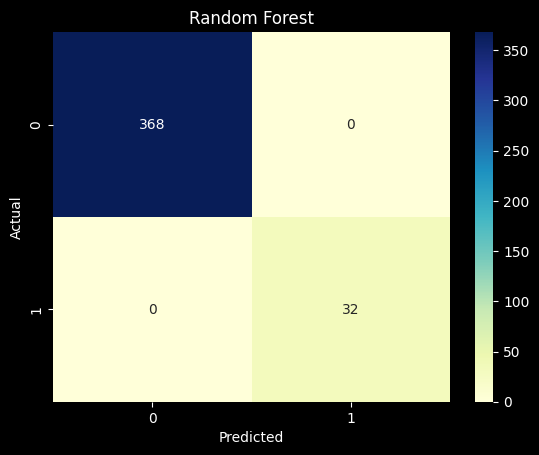


Report Random Forest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        32

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




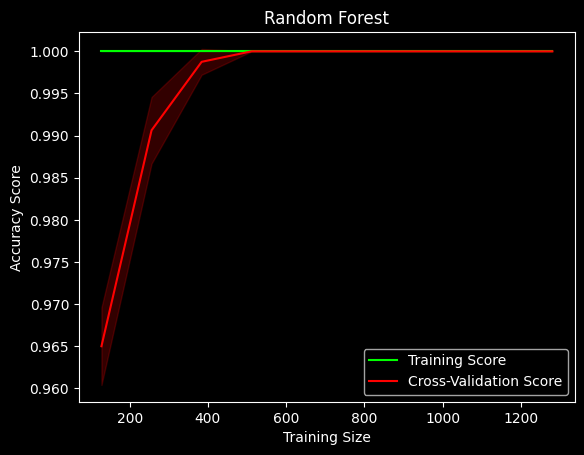


AUC: 1.00


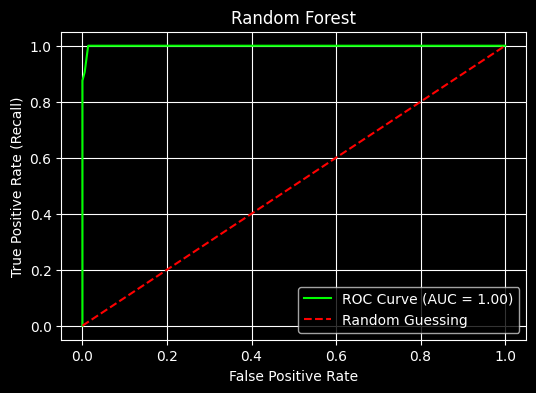

In [36]:
# Create a Random Forest Model
rf = RandomForestClassifier(random_state=42) # Model Selection
rf.fit(X_train,Y_train) # Train
rfPrediction = rf.predict(X_test) # Test
print()

# Accuracy Score
rfAccuracy = metrics.accuracy_score(rfPrediction,Y_test) 
print("Accuracy score Random Forest :", int(rfAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Random Forest :") 
rf = metrics.confusion_matrix(Y_test, rfPrediction) 
sns.heatmap(rf, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()
print()

# Classification Report
print("Report Random Forest :") 
print(metrics.classification_report(Y_test, rfPrediction)) 
print()

# Generate learning curve for Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy') # Perform 5-fold cross-validation
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train) # Train
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = tree.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score starts high and remains relatively stable as the training size increases, indicating that the model fits the training data well. The cross-validation score improves with more training data but then plateaus, suggesting that adding more data does not significantly improve the model’s accuracy beyond a certain point. The shaded area around the red line represents variability or confidence intervals for the cross-validation scores, indicating some uncertainty in the model’s performance on unseen data.

### Hyperparameter Tuning using Randomized Search

In [37]:
# Selecting the best model configuration
rf = RandomForestClassifier()

# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=5, verbose=2)

# Fit the model
random_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=144; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=144; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=144; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=144; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=144; total time=   0.2s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=72; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=72; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=72; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=72; total time=   0.0s
[CV] END max_depth=13, min_sampl


Accuracy score Random Forest (Best) : 100 %

Confusion Matrix Random Forest (Best) :


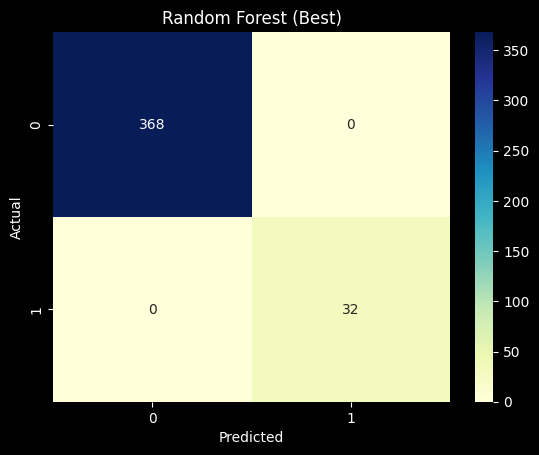


Random Forest (Best)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00        32

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400




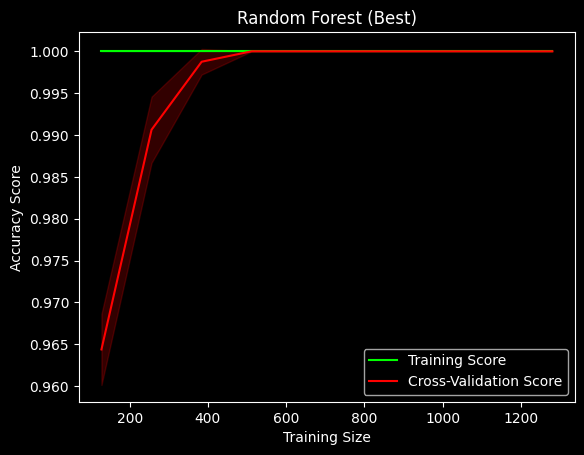


AUC: 1.00


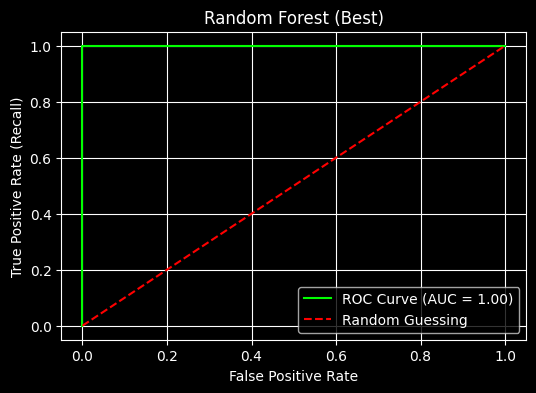

In [38]:
# Create a Random Forest model with best hyperparameters
rf = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=95,
    random_state=42
)
rf.fit(X_train, Y_train)
rfPrediction = rf.predict(X_test)
print()

# Accuracy Score
rfAccuracy = metrics.accuracy_score(rfPrediction,Y_test) 
print("Accuracy score Random Forest (Best) :", int(rfAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Random Forest (Best) :") 
rf = metrics.confusion_matrix(Y_test, rfPrediction) 
sns.heatmap(rf, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest (Best)')
plt.show()
print()

# Classification Report
print("Random Forest (Best)") 
print(metrics.classification_report(Y_test, rfPrediction)) 
print()

# Generate learning curve for Random Forest with best parameters
rf = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=95,
    random_state=42
)
rf.fit(X_train, Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Random Forest (Best)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Random Forest with best parameters
rf = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=95,
    random_state=42
)
rf.fit(X_train, Y_train)
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = log.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Random Forest (Best)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score starts high and remains relatively stable as the training size increases, indicating that the model fits the training data well. The cross-validation score improves with more training data but then plateaus, suggesting that adding more data does not significantly improve the model’s accuracy beyond a certain point. The shaded area around the red line represents variability or confidence intervals for the cross-validation scores, indicating some uncertainty in the model’s performance on unseen data.

## Correcting Class Imbalance
*Here, we increase the number of rows for positive class by duplication. When dealing with imbalanced datasets, especially when the majority of the samples belong to the negative class, improving model accuracy can be tricky since the model might simply predict the majority class.
We can assign higher weights to the minority class. This makes the model pay more attention to the underrepresented class. Or we can increase the number of samples in the minority class (positive class) to balance the dataset.*

In [39]:
# Ensure column is numeric
data['Above_580'] = pd.to_numeric(data['Above_580'], errors='coerce')

# Filter rows where column_name is 1
rows_to_duplicate = data[data['Above_580'] == 1]

# Repeat the rows to duplicate n times
n = 10  # Number of times you want to duplicate the rows
duplicated_rows = pd.concat([rows_to_duplicate] * n, ignore_index=True)

# Combine the original DataFrame with the duplicated rows
data_combined = pd.concat([data, duplicated_rows], ignore_index=True)

In [40]:
print(data_combined.shape)

(2880, 13)


In [41]:
print(data_combined['Above_580'].value_counts())
print((data_combined['Above_580'].value_counts() / 2880) * 100)

Above_580
0    1472
1    1408
Name: count, dtype: int64
Above_580
0    51.111111
1    48.888889
Name: count, dtype: float64


In [42]:
# Selecting the predictors and target
X = data_combined.drop(['Above_580','ID','Limit','Rating','Cards'], axis = 1)  # taking all columns as input except Above_580 column
Y = data_combined['Above_580']   # taking only Variety column as the target

In [43]:
# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split 

In [44]:
# Split the data into train and test
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify = Y)

print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (2160, 8)
Test Shape (720, 8)


In [45]:
# Printing the total counts of unique values in the Y_train
print(Y_train.value_counts())
print()  # printing a blank line for spacing

# Let's divide these values by 112 (total rows in training data) to get percentage.
print((Y_train.value_counts() / 2160) * 100)   # Multiply with 100 to get percentage
print()

# Printing the total counts of unique values in the Y_test
print(Y_test.value_counts())
print()

# Let's divide these values by 38 (total rows in testing data) to get percentage.
print((Y_test.value_counts() / 720) * 100)   # Multiply with 100 to get percentage

Above_580
0    1104
1    1056
Name: count, dtype: int64

Above_580
0    51.111111
1    48.888889
Name: count, dtype: float64

Above_580
0    368
1    352
Name: count, dtype: int64

Above_580
0    51.111111
1    48.888889
Name: count, dtype: float64


### Logistic Regression


Accuracy score Logistic Regression (Balanced) : 97 %

Confusion Matrix Logistic Regression (Balanced) :


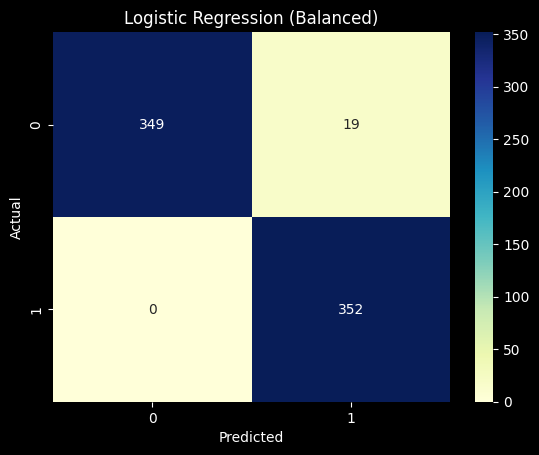


Logistic Regression (Balanced)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       368
           1       0.95      1.00      0.97       352

    accuracy                           0.97       720
   macro avg       0.97      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720


Percentage of negative and positive class distribution :
Above_580
0    1472
1    1408
Name: count, dtype: int64
Above_580
0    51.111111
1    48.888889
Name: count, dtype: float64



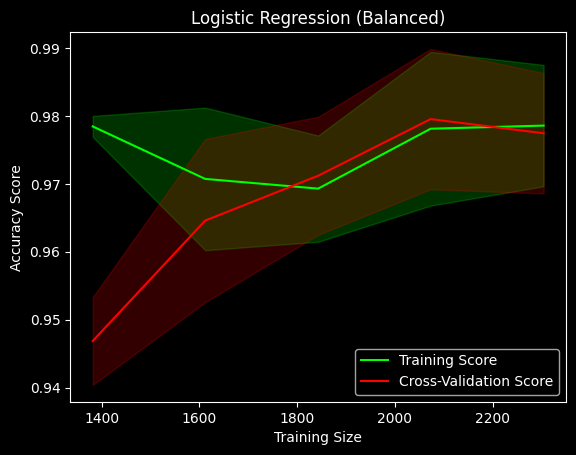


AUC: 1.00


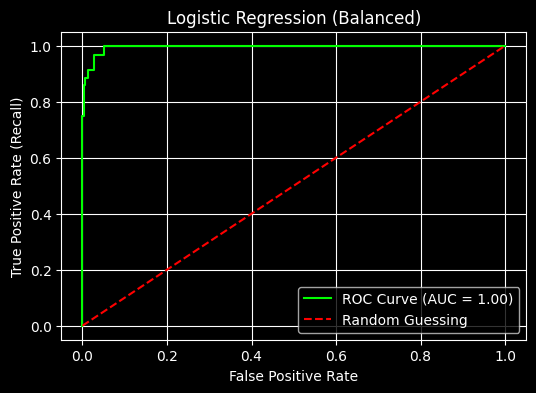

In [46]:
# Create a logistic regression model
log = LogisticRegression() # Model Selection
log.fit(X_train,Y_train) # Train
logPrediction = log.predict(X_test) # Test
print()

# Accuracy Score
logAccuracy = metrics.accuracy_score(logPrediction,Y_test) 
print("Accuracy score Logistic Regression (Balanced) :", int(logAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Logistic Regression (Balanced) :") 
log = metrics.confusion_matrix(Y_test, logPrediction) 
sns.heatmap(log, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression (Balanced)')
plt.show()
print()

# Classification Report
print("Logistic Regression (Balanced)") 
print(metrics.classification_report(Y_test, logPrediction)) 
print()

# Percentage of negative and positive class distribution
print("Percentage of negative and positive class distribution :")
print(data_combined['Above_580'].value_counts())
print((data_combined['Above_580'].value_counts() / 2880) * 100)
print()

# Generate learning curve for logistic regression (Balanced)
log = LogisticRegression()
log.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    log, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Logistic Regression (Balanced)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Logistic Regression (Balanced)
log = LogisticRegression()
log.fit(X_train,Y_train) # Train
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = log.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logistic Regression (Balanced)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** Training Score starts high and remains consistently high, indicating that the model fits the training data well. Cross-Validation Score starts lower than the training score but increases as the training size grows, eventually converging with the training score around a training size of 2000. The convergence of the training and cross-validation scores suggests that the model is generalizing well to unseen data as more training data is added. The narrow shaded area indicates low variance, meaning the model’s performance is stable across different subsets of the data.

### k-Nearest Neighbor


Accuracy score k-Nearest Neighbor (Balanced) : 100 %

Confusion Matrix k-Nearest Neighbor (Balanced) :


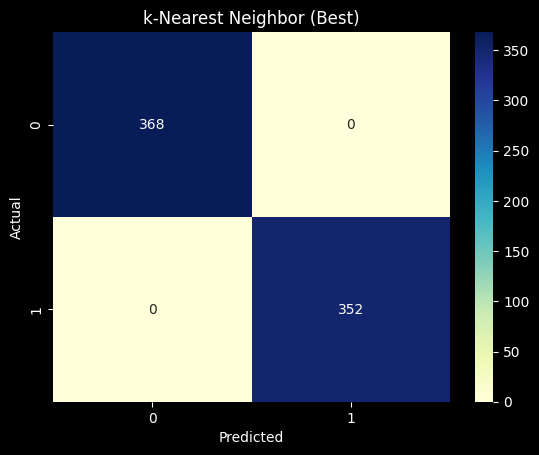


k-Nearest Neighbor (Balanced)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       352

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720




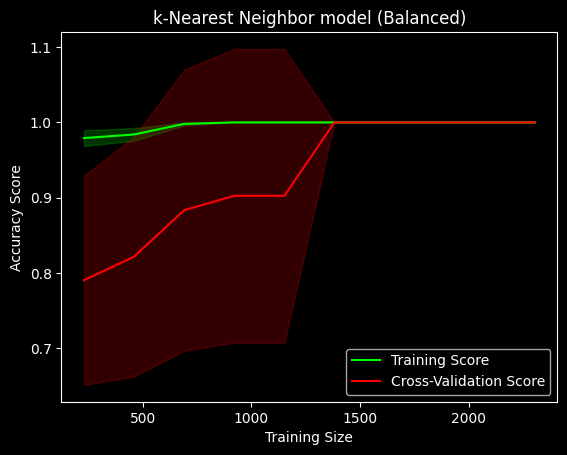


AUC: 1.00


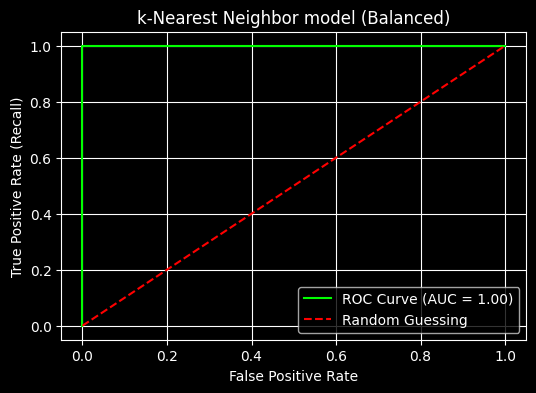

In [47]:
# Create a k-Nearest Neighbor model (Balanced)
knn = KNeighborsClassifier(n_neighbors=3) # Model Selection
knn.fit(X_train,Y_train) # Train
knnPrediction = knn.predict(X_test) # Test
print()

# Accuracy Score
knnAccuracy = metrics.accuracy_score(knnPrediction,Y_test) 
print("Accuracy score k-Nearest Neighbor (Balanced) :", int(knnAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix k-Nearest Neighbor (Balanced) :") 
knn = metrics.confusion_matrix(Y_test, knnPrediction) 
sns.heatmap(knn, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('k-Nearest Neighbor (Best)')
plt.show()
print()

# Classification Report
print("k-Nearest Neighbor (Balanced)") 
print(metrics.classification_report(Y_test, knnPrediction)) 
print()

# Generate learning curve for k-Nearest Neighbor (Balanced)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('k-Nearest Neighbor model (Balanced)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for k-Nearest Neighbor model (Balanced)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = knn.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('k-Nearest Neighbor model (Balanced)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** Training Score appears to stabilize at a very high accuracy (close to 1.0), suggesting the model performs extremely well on the training data. Cross-Validation Score starts lower but increases as the training size grows. It converges toward the training score, indicating that the model is generalizing well as more data is used.

### Support Vector Machine


Accuracy score Support Vector Machine (Balanced) : 97 %

Confusion Matrix Support Vector Machine (Balanced) :


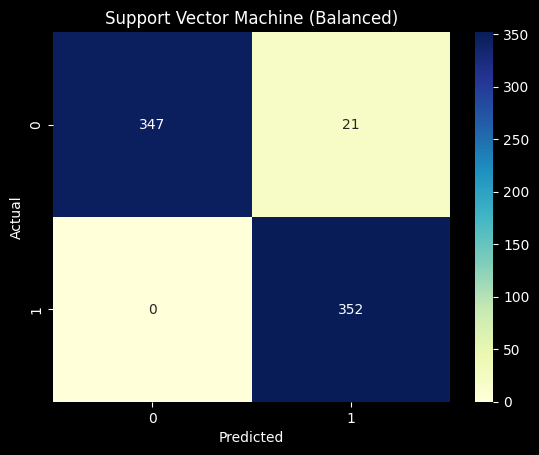


Support Vector Machine (Balanced) :
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       368
           1       0.94      1.00      0.97       352

    accuracy                           0.97       720
   macro avg       0.97      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720




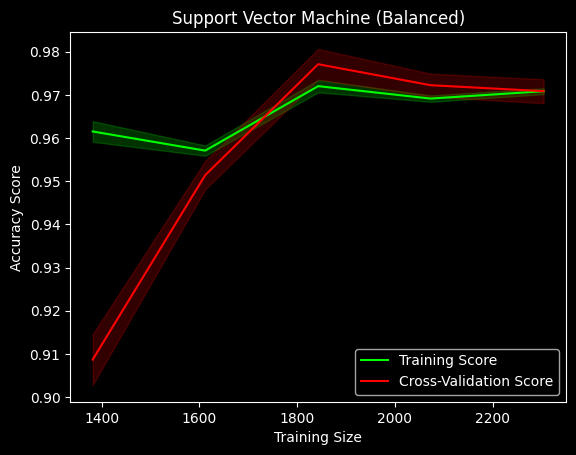


AUC: 1.00


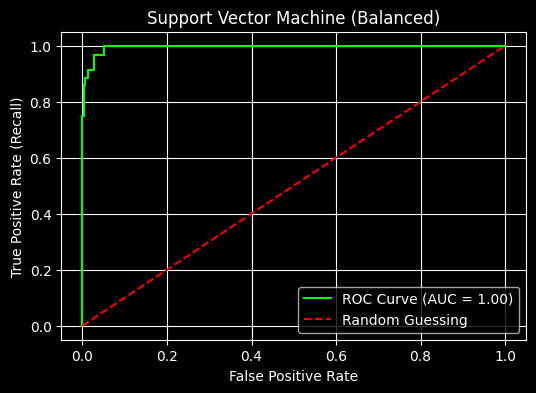

In [48]:
# Create a Support Vector Machine (Balanced) model
svc = SVC(probability=True) # Model Selection
svc.fit(X_train,Y_train) # Train
svcPrediction = svc.predict(X_test) # Test
print()

# Accuracy Score
svcAccuracy = metrics.accuracy_score(svcPrediction,Y_test) 
print("Accuracy score Support Vector Machine (Balanced) :", int(svcAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Support Vector Machine (Balanced) :") 
svc = metrics.confusion_matrix(Y_test, svcPrediction) 
sns.heatmap(svc, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine (Balanced)')
plt.show()
print()

# Classification Report
print("Support Vector Machine (Balanced) :") 
print(metrics.classification_report(Y_test, svcPrediction)) 
print()

# Generate learning curve for Support Vector Machine (Balanced)
svc = SVC(probability=True)
svc.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    svc, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Support Vector Machine (Balanced)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Support Vector Machine (Balanced)
svc = SVC(probability=True)
svc.fit(X_train,Y_train) # Train
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = log.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Support Vector Machine (Balanced)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :**
The accuracy on the training set slightly decreases as the training size increases, but remains high and consistent after around 1800 samples. This drop is expected as the model gets more complex data, making it harder to perfectly fit all examples.The cross-validation score shows steady improvement with increased training size. It peaks around 1800 samples, then starts to converge and stabilize close to the training score, suggesting the model is performing well in generalization with minimal overfitting. It seems the model performs well overall, and adding more training data past the 1800-2000 range provides only marginal improvements. 

### Decision Tree Classifier


Accuracy Score Decision Tree (Balanced) : 100 %

Confusion Matrix Decision Tree (Balanced) :


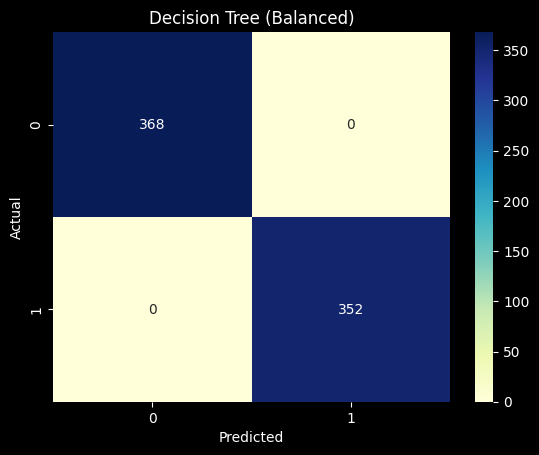


Decision Tree (Balanced) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       352

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720




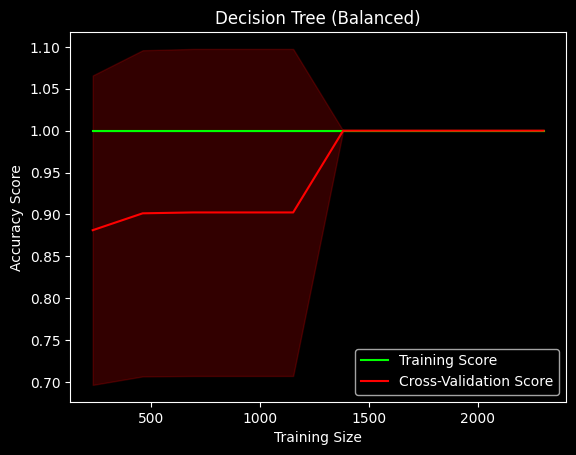


AUC: 1.00


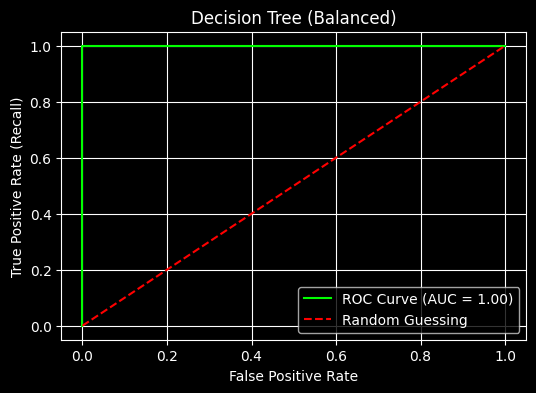

In [49]:
# Create a Decision Tree (Balanced) Model
tree = DecisionTreeClassifier() # Model Selection
tree.fit(X_train,Y_train) # Train
treePrediction = tree.predict(X_test) # Test
print()

# Accuracy Score
treeAccuracy = metrics.accuracy_score(treePrediction,Y_test) 
print("Accuracy Score Decision Tree (Balanced) :", int(treeAccuracy*100),"%")
print()

# Confusion Matrix
print("Confusion Matrix Decision Tree (Balanced) :") 
tree = metrics.confusion_matrix(Y_test, treePrediction) 
sns.heatmap(tree, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree (Balanced)')
plt.show()
print()

# Classification Report
print("Decision Tree (Balanced) :") 
print(metrics.classification_report(Y_test, treePrediction)) 
print()

# Generate learning curve for Decision Tree (Balanced)
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
train_sizes, train_scores, test_scores = learning_curve(
    tree, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy') # Perform 5-fold cross-validation
# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='lime')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
# Plot the bands around the scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lime', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Decision Tree (Balanced)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()
print()

# Generate ROC Curve for Decision Tree (Balanced)
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train) # Train
Y_test_int = Y_test.astype(int) # Convert '0' and '1' labels to integers
y_probs = tree.predict_proba(X_test)[:, 1] # Get predicted probabilities (for the positive class)
fpr, tpr, thresholds = roc_curve(Y_test_int, y_probs) # Calculate the ROC curve values
# Calculate the AUC
auc = roc_auc_score(Y_test_int, y_probs)
print(f"AUC: {auc:.2f}")
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='lime', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Decision Tree (Balanced)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print()

**Learning Curve :** The training score starts high and remains relatively stable as the training size increases, indicating that the model fits the training data well. The cross-validation score improves with more training data but then plateaus, suggesting that adding more data does not significantly improve the model’s accuracy beyond a certain point. The shaded area around the red line represents variability or confidence intervals for the cross-validation scores, indicating some uncertainty in the model’s performance on unseen data.

## K-Means Clustering for Market Segmentation

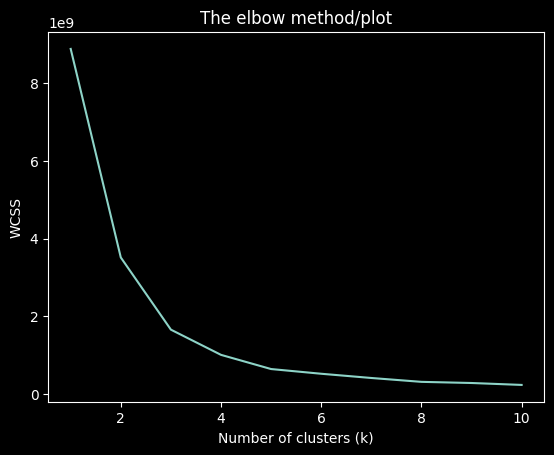

In [50]:
# K-Means Clustering - Deciding optimal k value

# Convert our dataframe to a form which is usable by kmeans
x = data.iloc[:,[1,2,3,4,5,6,11]].values # loc

# Import our kmeans algorithm
from sklearn.cluster import KMeans

# WCSS - Plot the elbow plot
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x) # train the algorithm with the input data (x)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia
    
# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,11), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [51]:
# We have decided on a k value = 5
kmeans = KMeans(n_clusters=5)
kmeans_model = kmeans.fit(x) # Training the model on input data

print(kmeans_model)

y_kmeans = kmeans_model.predict(x)

KMeans(n_clusters=5)


In [52]:
# Printing each row with its respective cluster defined by K-Means
print('Each segment\'s clusters:', kmeans_model.labels_)
data['Segment'] = kmeans_model.labels_
data.head()

Each segment's clusters: [4 3 3 ... 4 2 1]


ID   Income  Limit  Rating  Cards  Age  Education  Gender  Student  \
0   1   14.891   3606     283      2   34         11       1        0   
1   2  106.025   6645     483      3   82         15       0        1   
2   3  104.593   7075     514      4   71         11       1        0   
3   4  148.924   9504     681      3   36         11       0        0   
4   5   55.882   4897     357      2   68         16       1        0   

   Married  Ethnicity  Balance  Above_580  Segment  
0        1          2      333          0        4  
1        1          1      903          0        3  
2        0          1      580          0        3  
3        0          1      964          1        0  
4        1          2      331          0        1

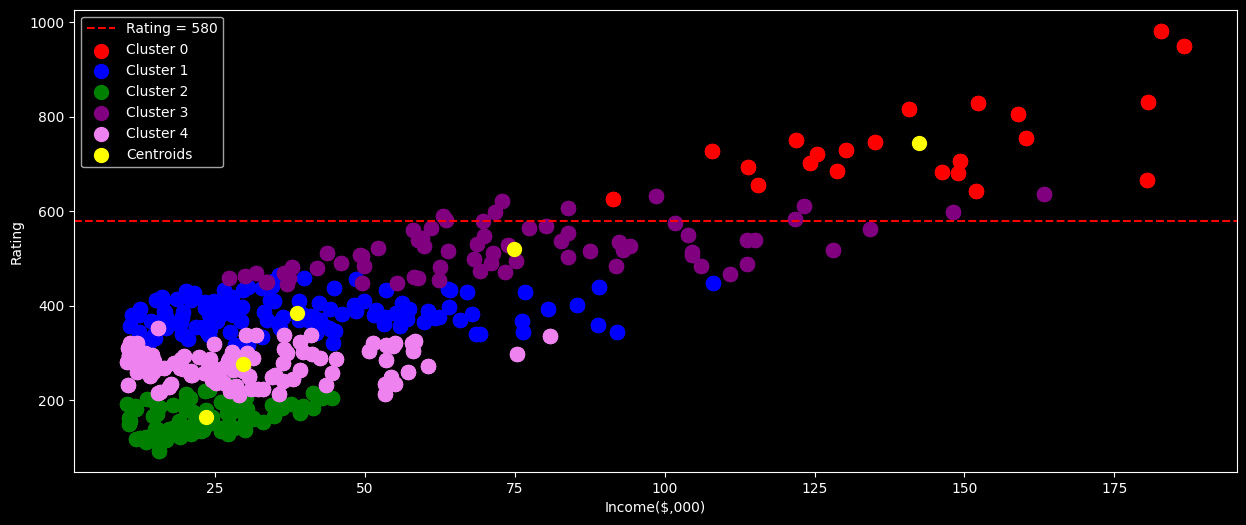

In [53]:
# Rating vs Income

# 2D plots on any 2 columns
plt.figure(figsize=(15,6))

# Drawing the horizontal line at y = 580
plt.axhline(y=580, color='r', linestyle='--', label='Rating = 580')

# Plot scatter plots
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,2],
           s=100, c='red', label='Cluster 0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,2],
           s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,2],
           s=100, c='green', label='Cluster 2')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,2],
           s=100, c='purple', label='Cluster 3')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,2],
           s=100, c='violet', label='Cluster 4')

# Cluster Centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,2],
           s=100, c='yellow', label='Centroids')

plt.xlabel('Income($,000)')
plt.ylabel('Rating')
plt.legend()
plt.show()